In [148]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 

In [150]:
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

3.7.0
0.12.2
1.4.4
1.25.1
1.4.0


### Libraries Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [4]:
df = pd.read_csv('crop_yield.csv')
df

Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [5]:
df.shape #19689 observations, 10 features

(19689, 10)

In [6]:
df.duplicated().sum() #no duplicates

0

In [7]:
df.isnull().sum() #no missing values

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

## Problem Statement 1: Impact of Climate on Crop Yield

**Objective:** Analyze the impact of climate variables, such as rainfall, on the yield of different crops over the years.

**Hypotheses:**

Impact of Precipitation on Crops:

**Severely Impacted by Heavy Rainfall:**

- Pulses (e.g., Moong, Urad, Arhar/Tur, Gram, Masoor, Peas & beans): Excessive rainfall can lead to waterlogging, which is detrimental to pulse crops.

- Oilseeds (e.g., Groundnut, Soyabean, Sunflower, Sesame, Castor seed, Linseed): These crops prefer well-drained soils, and heavy rainfall can cause fungal diseases and rot.

- Cereals like Maize and Bajra: Though cereals generally tolerate some rain, excessive rainfall can lead to fungal infections and reduce yield.

**Flourish Due to Heavy Rainfall:**

- Rice: Paddy fields thrive in regions with abundant water supply, making rice one of the crops that benefit from heavy rainfall.

- Sugarcane: Requires a lot of water and typically does well in areas with good rainfall.

- Jute: Flourishes in warm and humid climates with plenty of rain.

- Cotton: Although cotton is drought-tolerant, it does well in moderate to heavy rainfall regions with proper drainage.

### Crop

In [8]:
df['Crop'].value_counts()

Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic    

In [9]:
len(df['Crop'].value_counts())

55

#### Numerous categories in Crop feature - needs to reduce it

In [10]:
# Group crops into broader categories
# Define a dictionary to map the original categories to the new groups
crop_mapping = {
    'Rice': 'Cereals & Grains',
    'Maize': 'Cereals & Grains',
    'Wheat': 'Cereals & Grains',
    'Barley': 'Cereals & Grains',
    'Bajra': 'Cereals & Grains',
    'Jowar': 'Cereals & Grains',
    'Ragi': 'Cereals & Grains',
    'Small millets': 'Cereals & Grains',
    'Other Cereals': 'Cereals & Grains',
    
    'Moong(Green Gram)': 'Pulses',
    'Urad': 'Pulses',
    'Arhar/Tur': 'Pulses',
    'Gram': 'Pulses',
    'Horse-gram': 'Pulses',
    'Peas & beans (Pulses)': 'Pulses',
    'Other Kharif pulses': 'Pulses',
    'Other  Rabi pulses': 'Pulses',
    'Moth': 'Pulses',
    'Khesari': 'Pulses',
    'Other Summer Pulses': 'Pulses',
    'Masoor': 'Pulses',
    'Cowpea(Lobia)': 'Pulses',

    
    'Groundnut': 'Oilseeds',
    'Sesamum': 'Oilseeds',
    'Rapeseed &Mustard': 'Oilseeds',
    'Soyabean': 'Oilseeds',
    'Sunflower': 'Oilseeds',
    'Linseed': 'Oilseeds',
    'Castor seed': 'Oilseeds',
    'Safflower': 'Oilseeds',
    'Niger seed': 'Oilseeds',
    'Other oilseeds': 'Oilseeds',
    'Oilseeds total': 'Oilseeds',
    
    'Potato': 'Fruits, Vegetables & Tubers',
    'Sweet potato': 'Fruits, Vegetables & Tubers',
    'Onion': 'Fruits, Vegetables & Tubers',
    'Garlic': 'Fruits, Vegetables & Tubers',
    'Tapioca': 'Fruits, Vegetables & Tubers',
    'Banana': 'Fruits, Vegetables & Tubers',

    
    'Turmeric': 'Spices',
    'Ginger': 'Spices',
    'Coriander': 'Spices',
    'Cardamom': 'Spices',
    'Black pepper': 'Spices',
    'Dry chillies': 'Spices',
    
    'Cotton(lint)': 'Cash Crops',
    'Sugarcane': 'Cash Crops',
    'Tobacco': 'Cash Crops',
    'Jute': 'Cash Crops',
    'Mesta': 'Cash Crops',
    'Coconut': 'Cash Crops',
    'Cashewnut': 'Cash Crops',
    'Arecanut': 'Cash Crops',
    'Guar seed': 'Cash Crops',
    'Sannhamp': 'Cash Crops',
    
}

# Apply the mapping to your dataframe
df['Crop'] = df['Crop'].map(crop_mapping)


# Print the crops that went into 'Miscellaneous'
# print("Crops categorized as 'Miscellaneous':", miscellaneous_crops)

# Also print the value counts to see the distribution
df['Crop'].value_counts()

# Ye code use kar lena lekin Pehle 'Coconut' ko hata dena data se

Cereals & Grains               5180
Pulses                         4601
Oilseeds                       3726
Cash Crops                     2355
Fruits, Vegetables & Tubers    2051
Spices                         1478
Name: Crop, dtype: int64

In [11]:
df.isnull().sum() ##NaN must be there due to mismatch in some crop's name - No time to recheck

Crop               298
Crop_Year            0
Season               0
State                0
Area                 0
Production           0
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield                0
dtype: int64

In [12]:
# Just removing those Missing values
df = df.dropna()

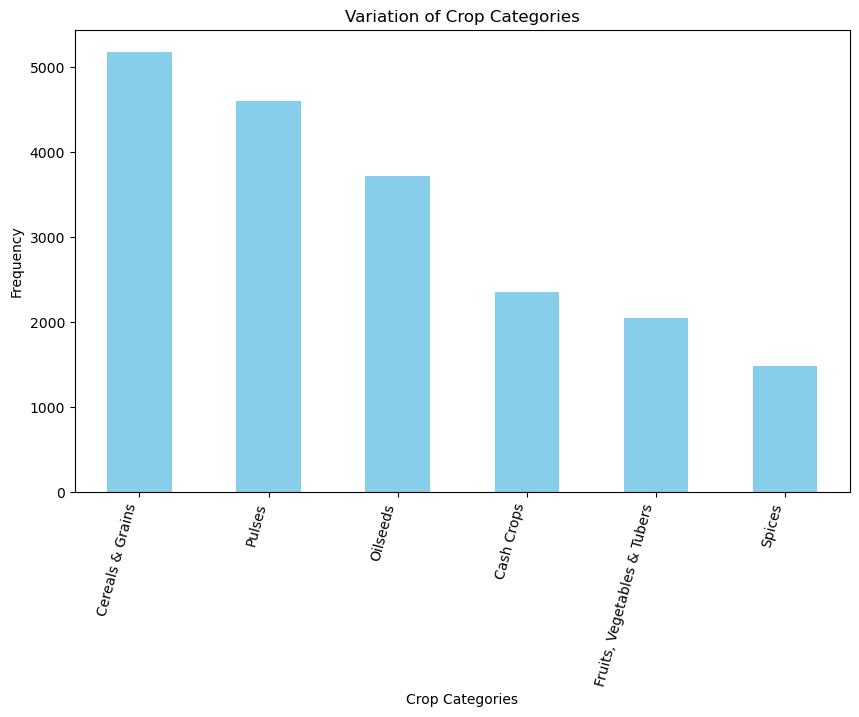

In [13]:
import matplotlib.pyplot as plt

# Assuming df['Crop'] contains the categorized crops
crop_counts = df['Crop'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
crop_counts.plot(kind='bar', color='skyblue')
plt.title('Variation of Crop Categories')
plt.xlabel('Crop Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=75, ha='right')
plt.show()


**The major crops of our country are ---> Cereals and Grains, Pulses and Oilseeds**

### Studying the distribution of crops regionwise - statewise

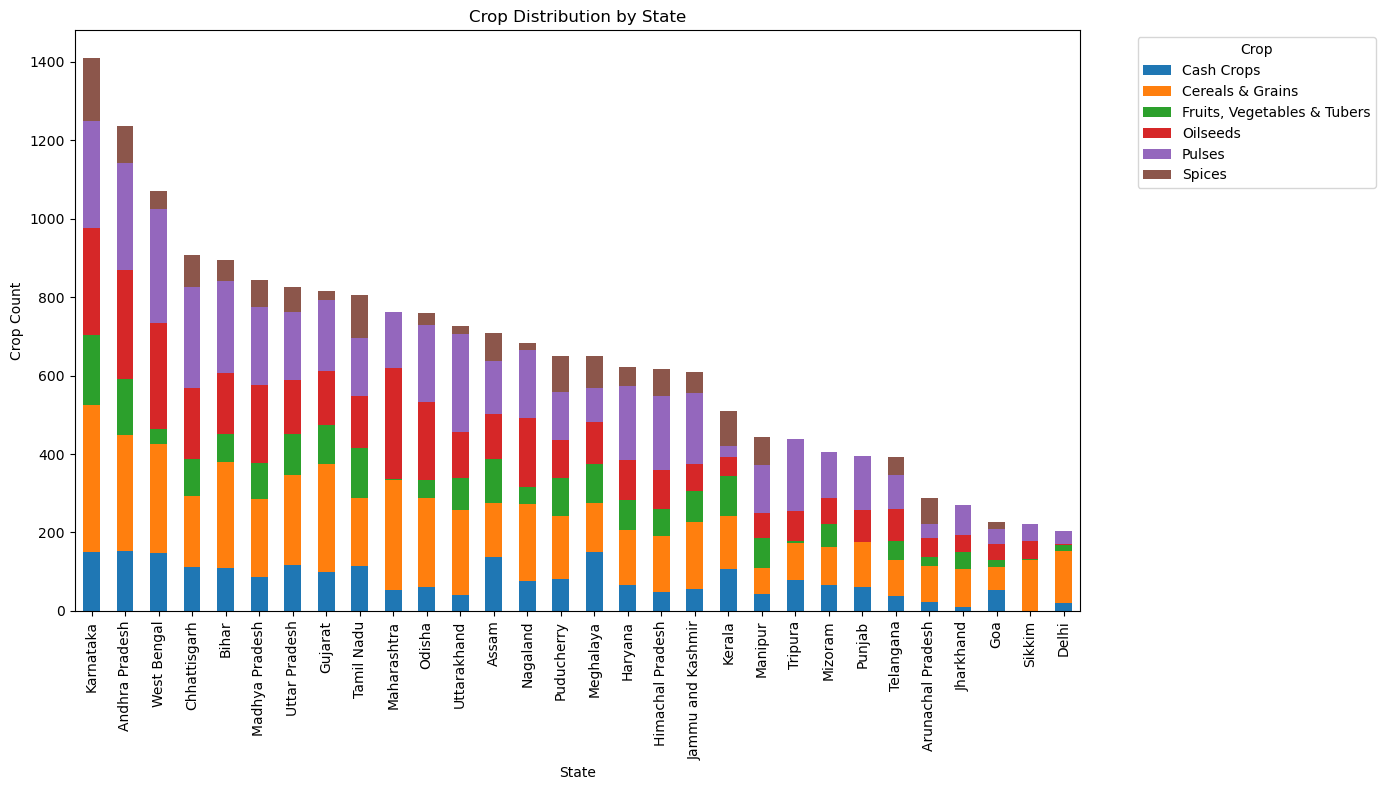

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Group by State and Crop and count the occurrences
crop_distribution = df.groupby(['State', 'Crop']).size().unstack(fill_value=0)

# Sort the data by the total crop count for each state
crop_distribution['Total'] = crop_distribution.sum(axis=1)
crop_distribution = crop_distribution.sort_values(by='Total', ascending=False)
crop_distribution = crop_distribution.drop(columns=['Total'])

# Plotting a bar plot for each state
crop_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Crop Distribution by State')
plt.xlabel('State')
plt.ylabel('Crop Count')
plt.xticks(rotation=90)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- **Most of the states grow almost all the crops but the count of each crops for different states are different**
- **The most common crops most of the states are "Pulses", "Cereals & Grains" and "Oilseeds"**
- **Most of the data of our dataset belongs to the states of Karnataka, Andhra Pradesh, West Bengal, Chattisgarh, Bihar, Madhya Pradesh and Uttar Pradesh.**

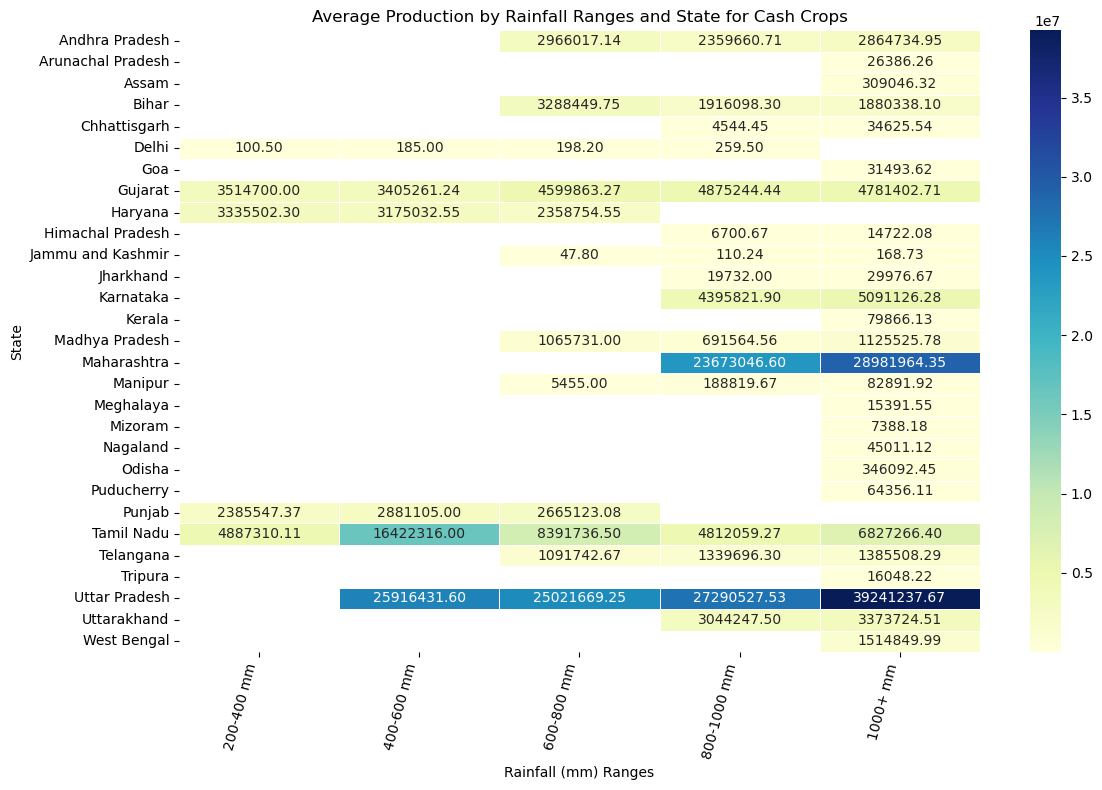

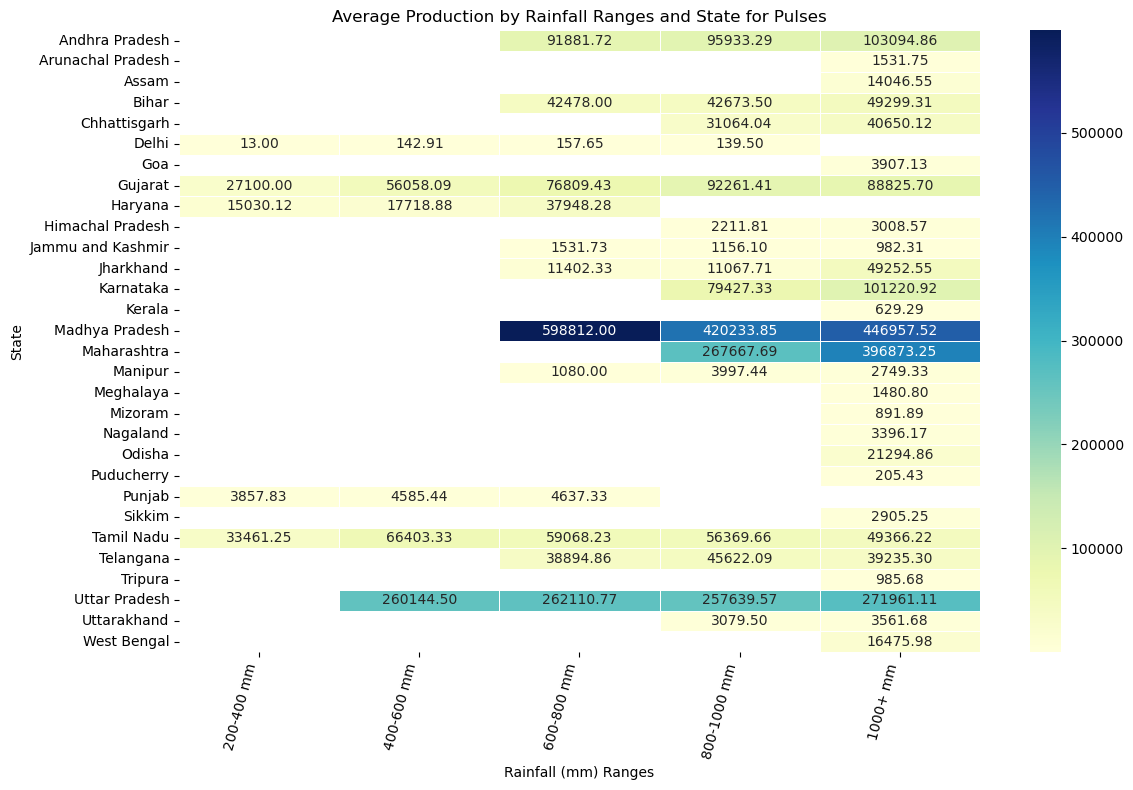

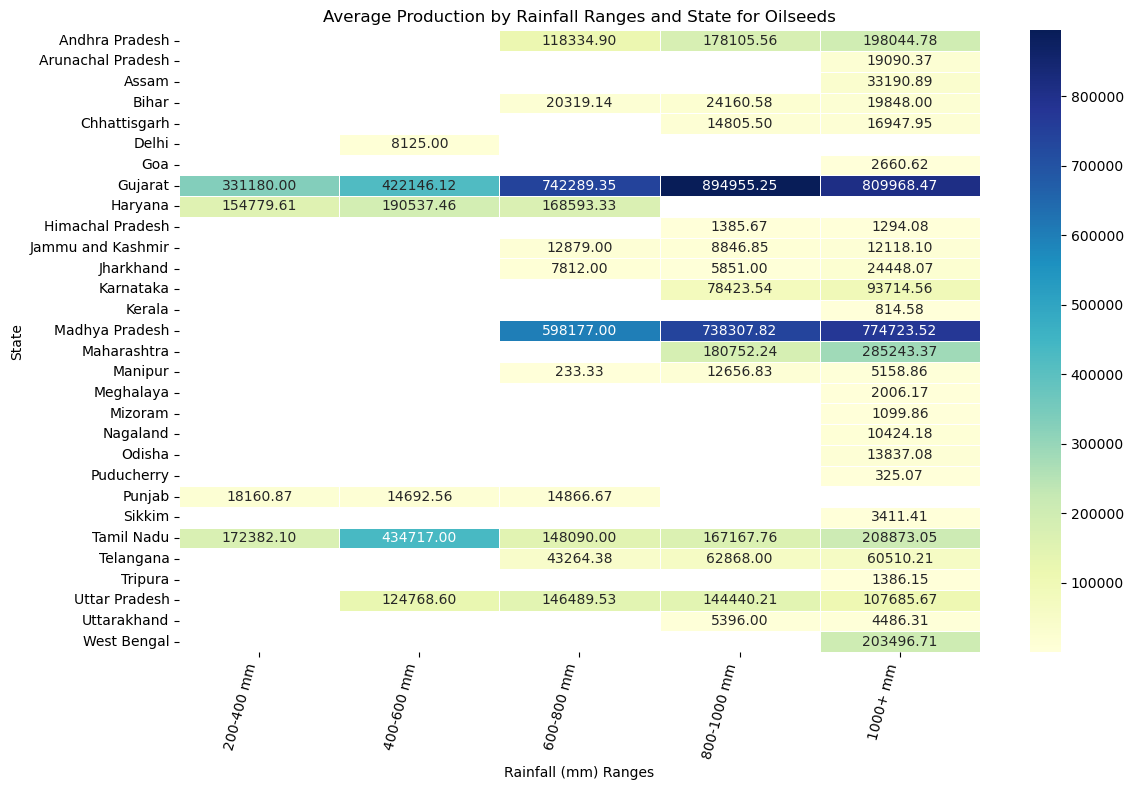

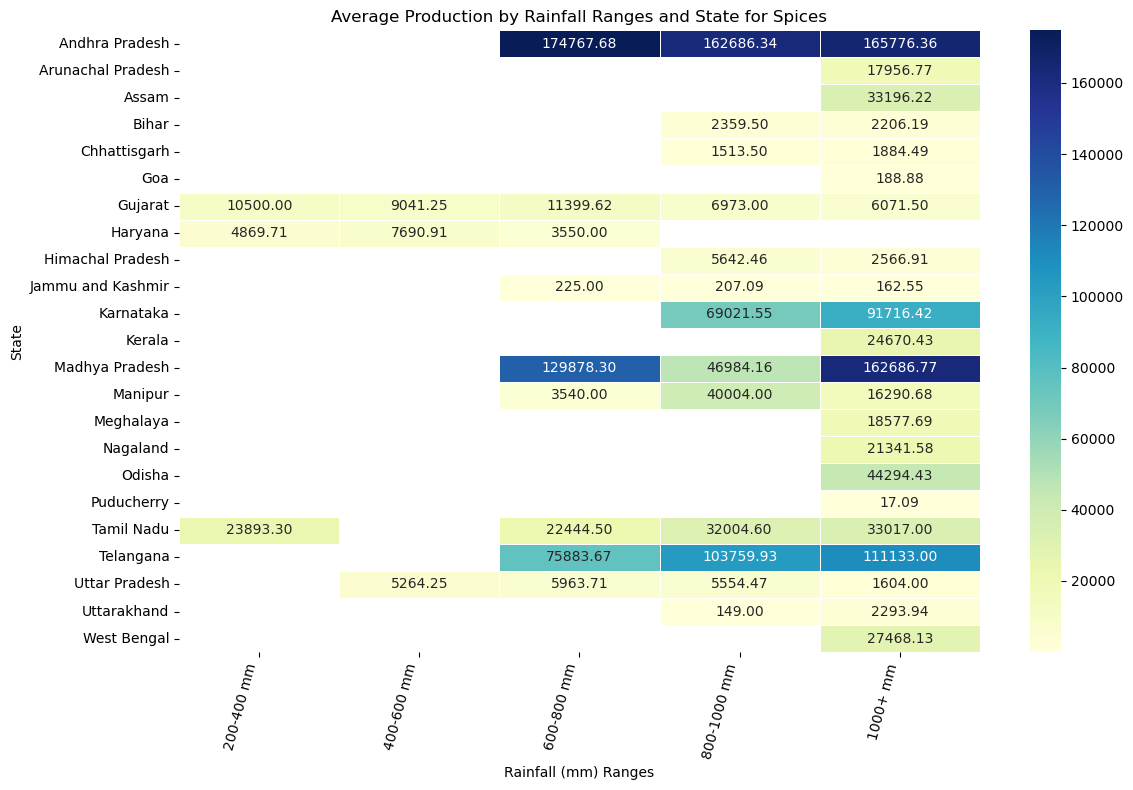

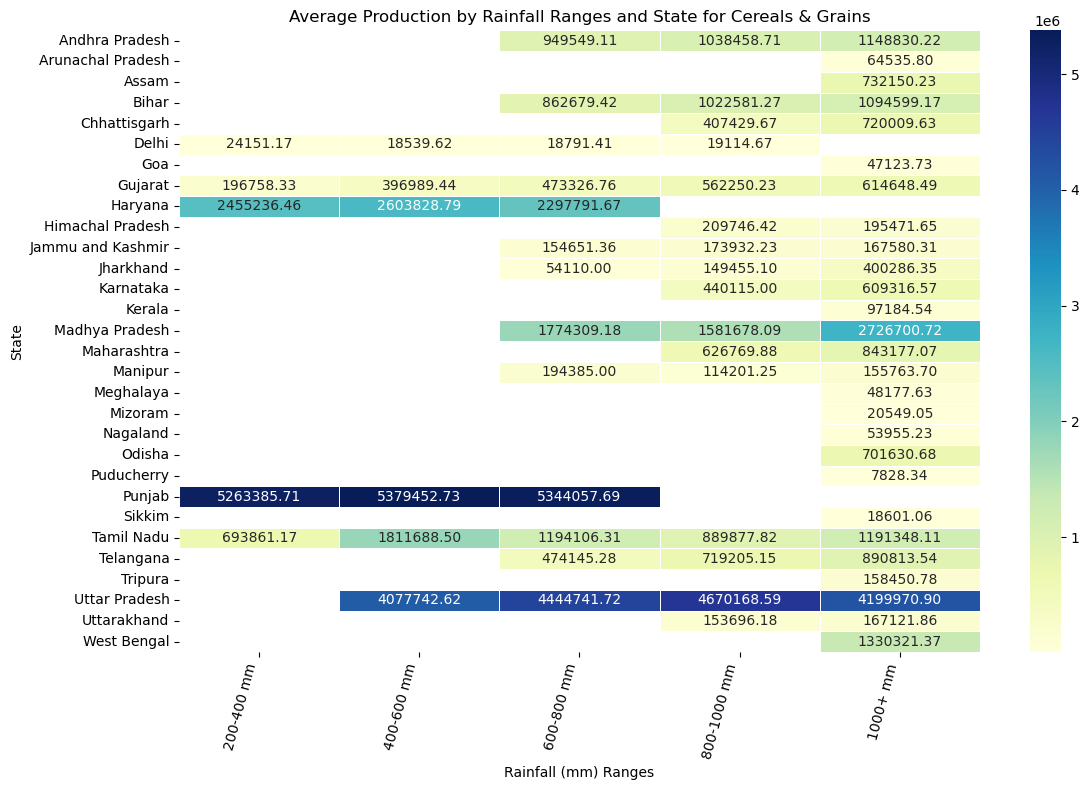

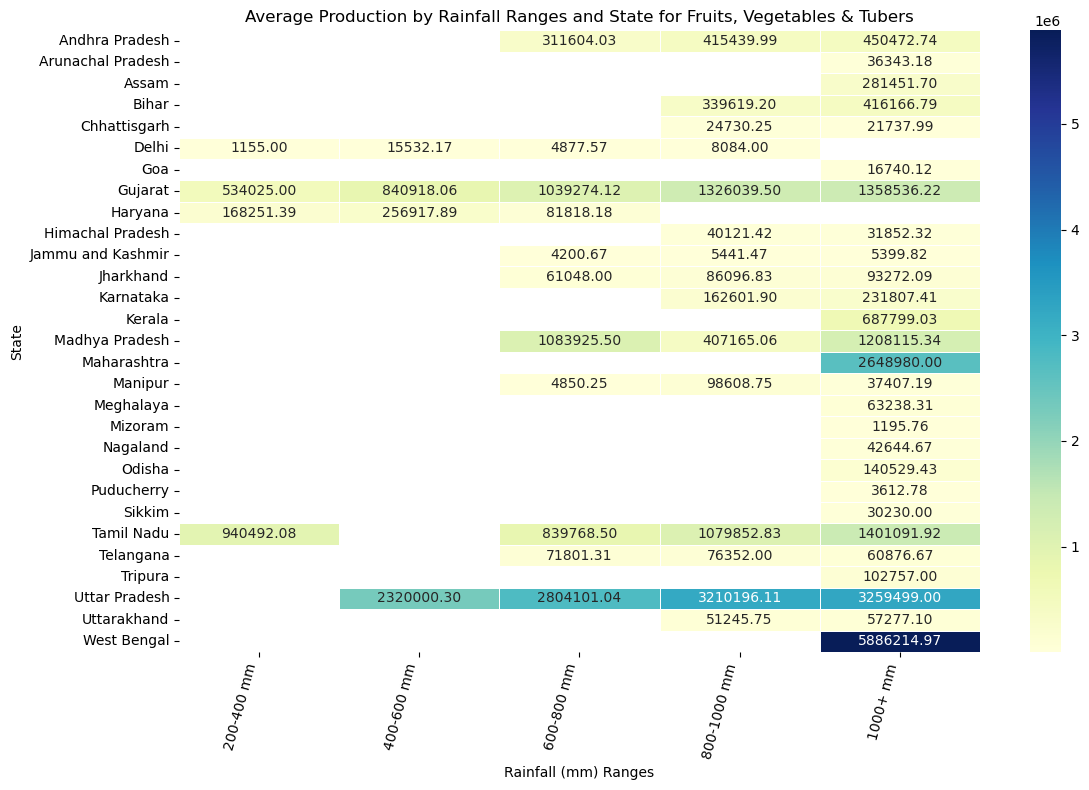

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and has columns: 'State', 'Annual_Rainfall', 'Production', 'Crop'

# Create rainfall bins
df['Rainfall_bins'] = pd.cut(df['Annual_Rainfall'], bins=[0, 200, 400, 600, 800, 1000, df['Annual_Rainfall'].max()],
                             labels=['0-200 mm', '200-400 mm', '400-600 mm', '600-800 mm', '800-1000 mm', '1000+ mm'])

# List of crops
crops = df['Crop'].unique()

# Loop through each crop and create a heatmap
for crop in crops:
    # Filter data for the current crop
    df_crop = df[df['Crop'] == crop]
    
    # Create a pivot table for the heatmap
    pivot_table = df_crop.pivot_table(index='State', columns='Rainfall_bins', values='Production', aggfunc='mean')
    
    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
    plt.title(f'Average Production by Rainfall Ranges and State for {crop}')
    plt.xlabel('Rainfall (mm) Ranges')
    plt.ylabel('State')
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()


#### The same can be confirmed from the heatmap

In [16]:
df[df['Yield']> 400] #bohot bada outlier

Crop  Crop_Year       Season        State  Area  Production  \
6259  Cereals & Grains       1997  Autumn       Maharashtra  21.0       19695   

      Annual_Rainfall  Fertilizer  Pesticide   Yield Rainfall_bins  
6259           1156.1     1998.57       6.51  989.87      1000+ mm

- **21 hectares = 21*2.5 acres = 52.5 acres.. 52.5 acre land cannot produce 19695 tons of crop yield especially in case of cereals and grains**
- It is not possible, hence removing this outlier from our analysis.

In [17]:
#Removing the outlier
df = df[df['Yield']<400]

### Multivariate Analysis

### Studying the Impact of Precipitation - Annual Rainfall on the Crops and their Yield- Region Wise

In [18]:
df['Yield'].describe()

count    19390.000000
mean         4.376232
std         12.804849
min          0.000000
25%          0.598785
50%          1.025000
75%          2.333125
max        381.420000
Name: Yield, dtype: float64

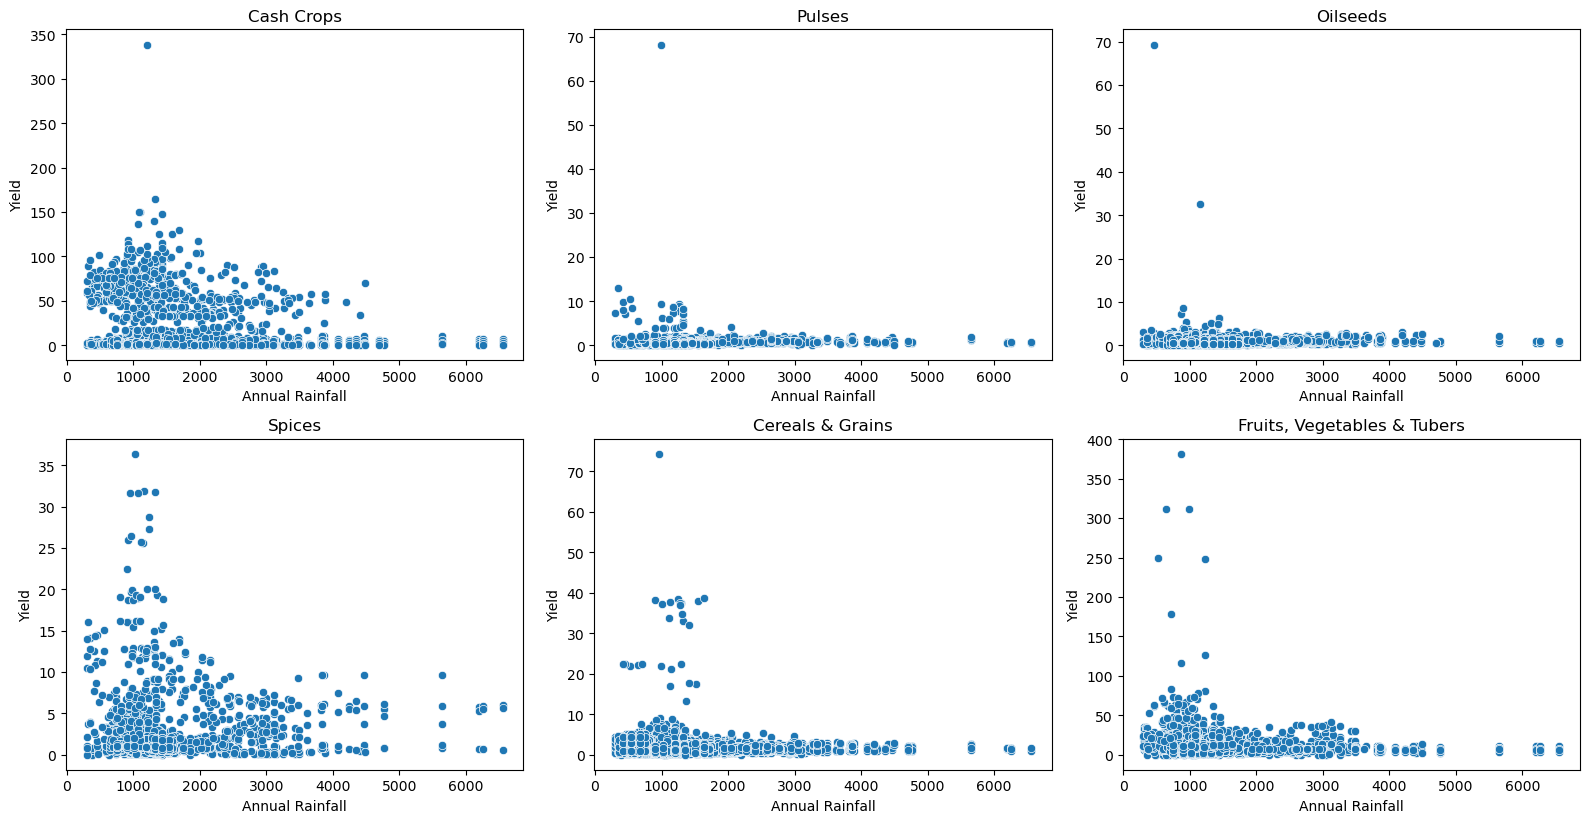

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(16, 12))

# List of unique crops
crops = df['Crop'].unique()

# Determine the number of rows and columns for subplots
rows = len(crops) // 3 + 1
cols = 3

# Iterate through each crop and create a subplot
for i, crop in enumerate(crops, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x='Annual_Rainfall', y='Yield', data=df[df['Crop'] == crop])
    plt.title(f'{crop}')
    plt.xlabel('Annual Rainfall')
    plt.ylabel('Yield')

plt.tight_layout()
plt.show()


- **Most of the crops have poor yield as the precipitation increases**
- **The optimal annual precipitation to produce better yield for Cash Crops is ~200-2500**
- **The optimal annual precipitation to produce better yield for Pulses is <1500 though the yield for pulses is usually less. Heavy rainfall may lead to negligible  yield of pulses**
- **The optimal annual precipitation to produce better yield for Oilseeds is <1500. Heavy rainfall may lead to negligible  yield of Oilseeds**
- **The optimal annual precipitation to produce better yield for Spices is ~ 200-3500 but maximum yield happens when the annual precipitation range is around ~800-1500**
- **The optimal annual precipitation to produce better yield for Cereals & Grains is around ~ <2000. Heavy rainfall may lead to negligible yield of cereals & grains**
- **The optimal annual precipitation to produce better yield for Fruits, Vegetables & Tubers is ~ 200-1500 for maximum yield**


**CONCLUSION** - 

Only Spices are not much impacted by the annual rainfall but rest of all the crops are impacted by the annual rainfall especially in case of heavy rainfall -->The yield becomes almost negligible but the analysis is still not clear and we need to see the trend analysis to confirm these statements.



### Studying the precipitation patterns over the years and its impact on the yield of the crops

In [20]:
df.head(1)

Crop  Crop_Year       Season  State     Area  Production  \
0  Cash Crops       1997  Whole Year   Assam  73814.0       56708   

   Annual_Rainfall  Fertilizer  Pesticide     Yield Rainfall_bins  
0           2051.4  7024878.38   22882.34  0.796087      1000+ mm

   Crop_Year  Annual_Rainfall     Yield
0       1997      1588.424938  3.894809
1       1998      1754.785603  4.343536
2       1999      1583.703028  4.358907
3       2000      1445.427760  3.947982
4       2001      1403.384602  3.945474


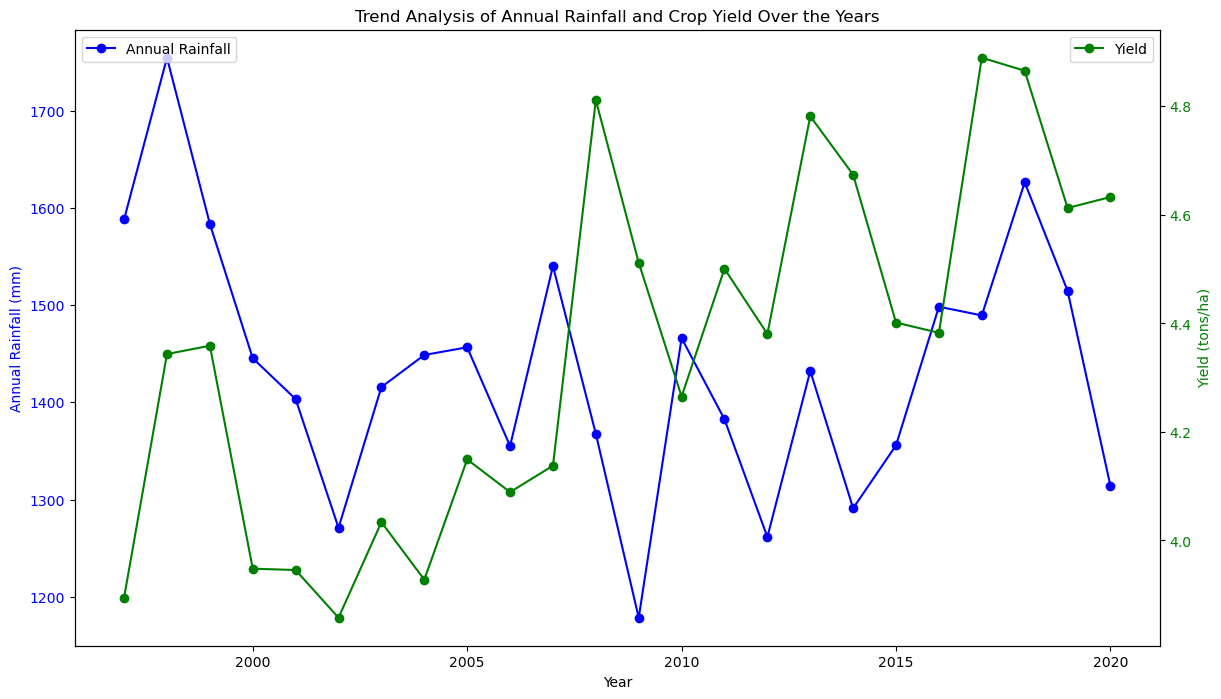

In [21]:
import pandas as pd

# Group the data by year and calculate mean values
annual_data = df.groupby('Crop_Year').agg({
    'Annual_Rainfall': 'mean',
    'Yield': 'mean'
}).reset_index()

# Display the first few rows of the aggregated data
print(annual_data.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot annual rainfall
ax1.plot(annual_data['Crop_Year'], annual_data['Annual_Rainfall'], color='blue', marker='o', label='Annual Rainfall')
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual Rainfall (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for crop yield
ax2 = ax1.twinx()
ax2.plot(annual_data['Crop_Year'], annual_data['Yield'], color='green', marker='o', label='Yield')
ax2.set_ylabel('Yield (tons/ha)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Trend Analysis of Annual Rainfall and Crop Yield Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


- **It can be clearly observed that the amount of rainfall has decreased over the years and mostly ranges around ~1300 - 1600 mm**
- **Also, the yield of the crops have increased in the past decade and now varies around ~4.5 tons/hectares in the recent years**
- **There is no clear observation on the impact of annual rainfall on the yield of the crops**

### Trend Analysis to see whether individual crop categories are impacted by the annual rainfall

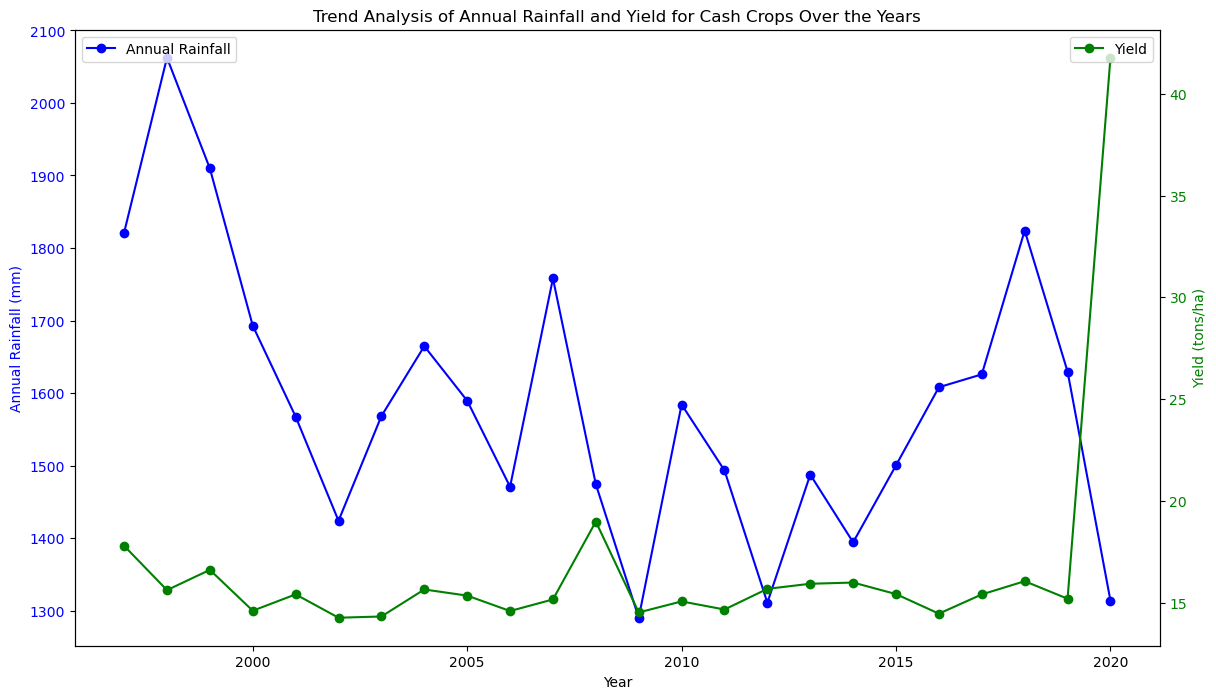

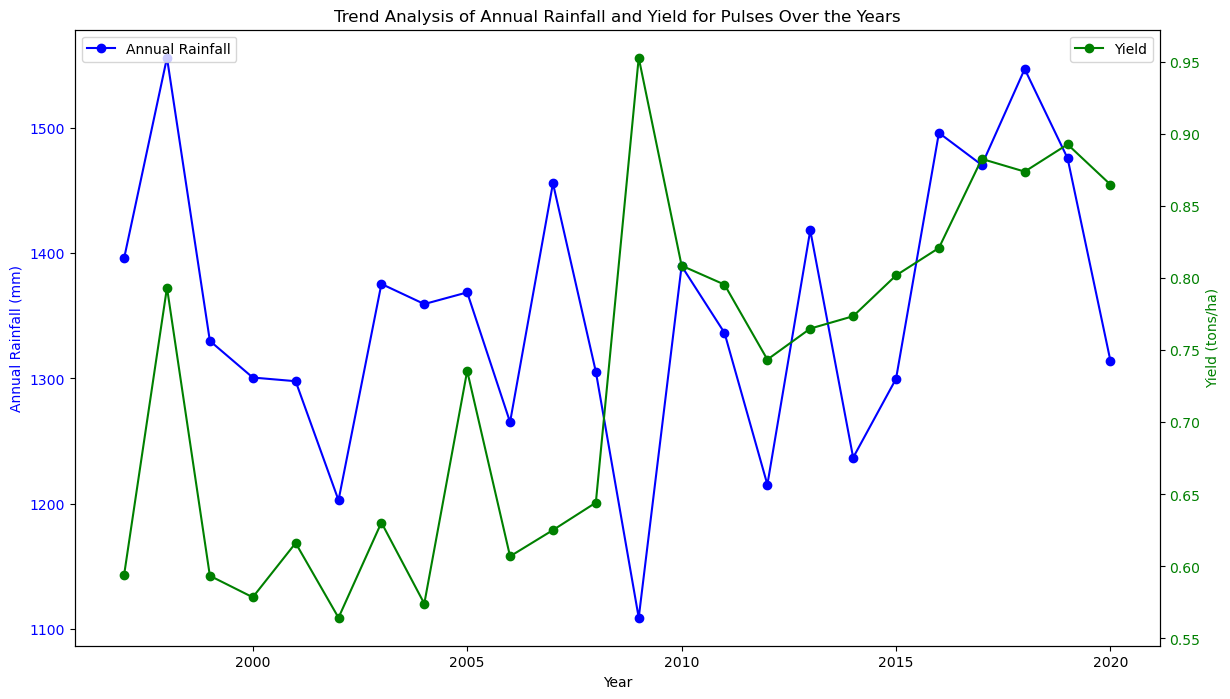

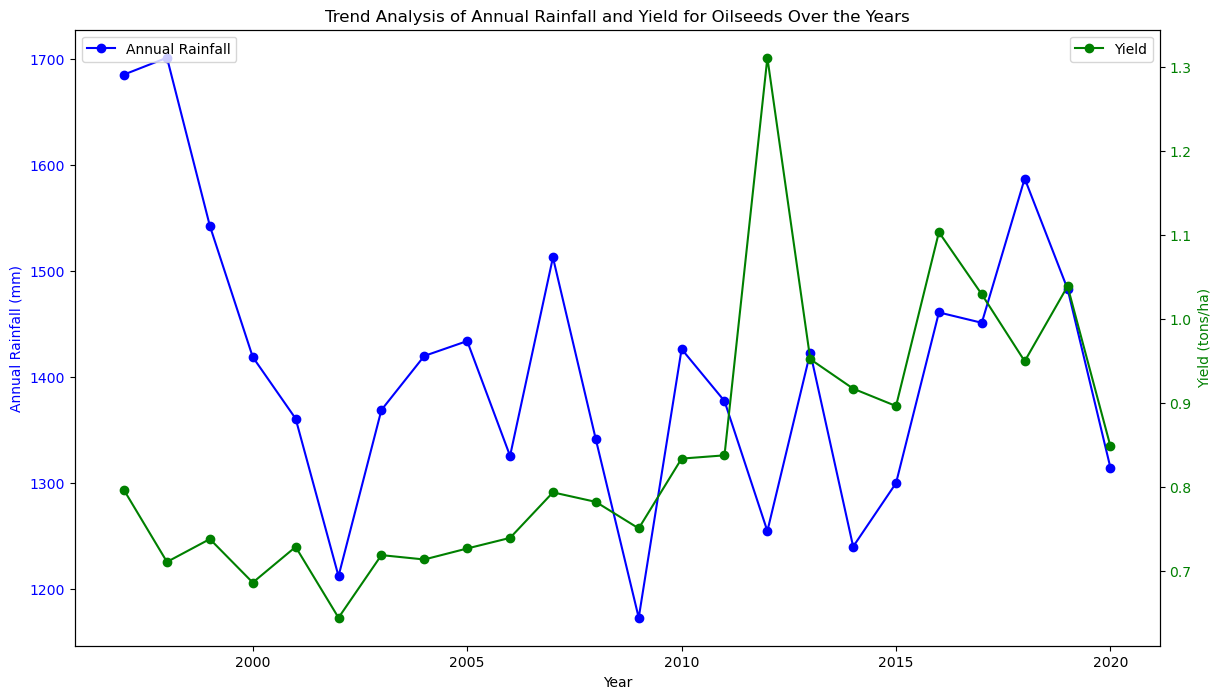

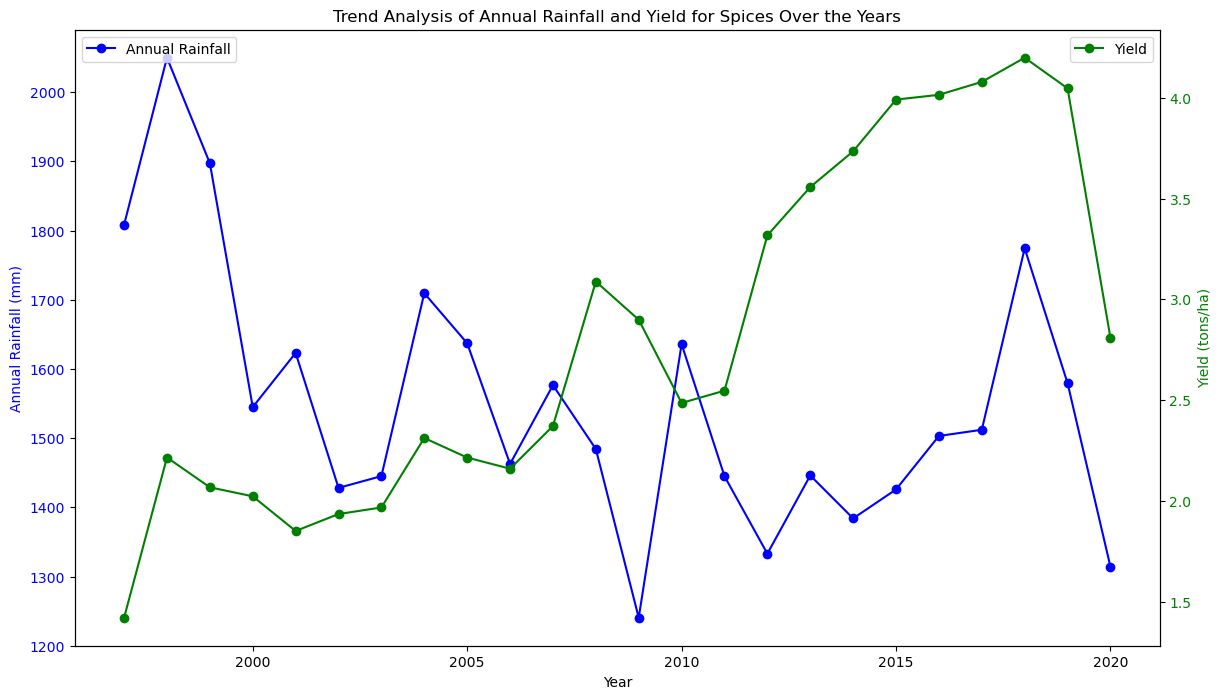

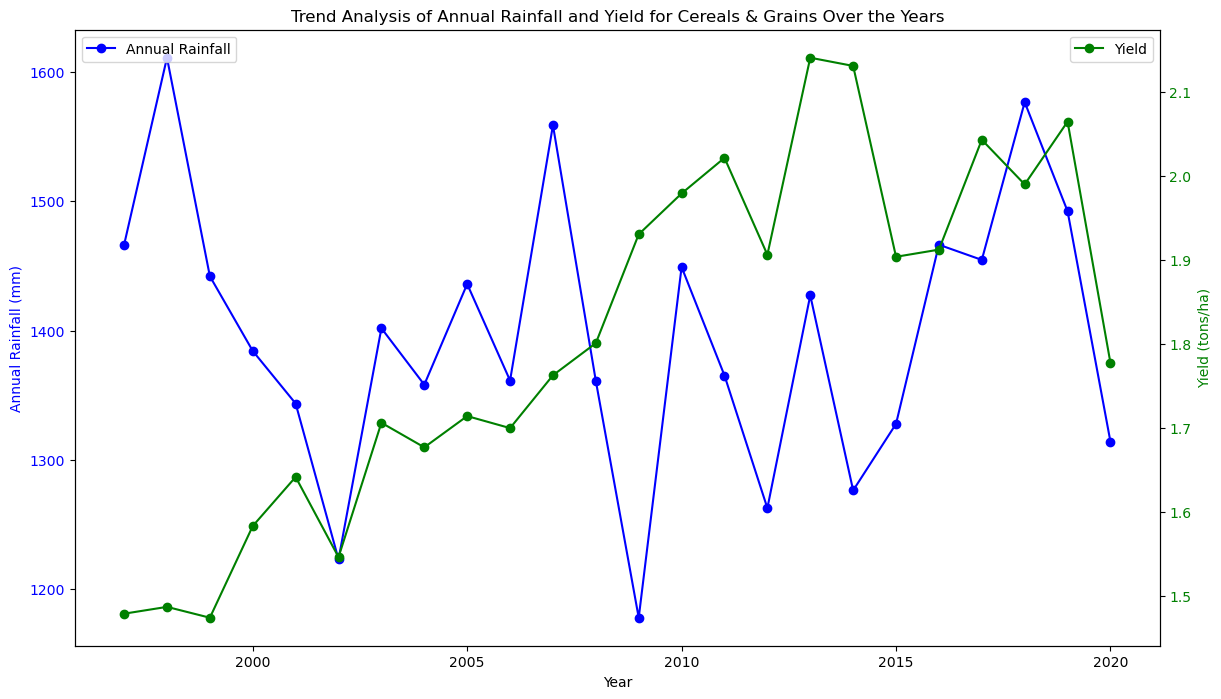

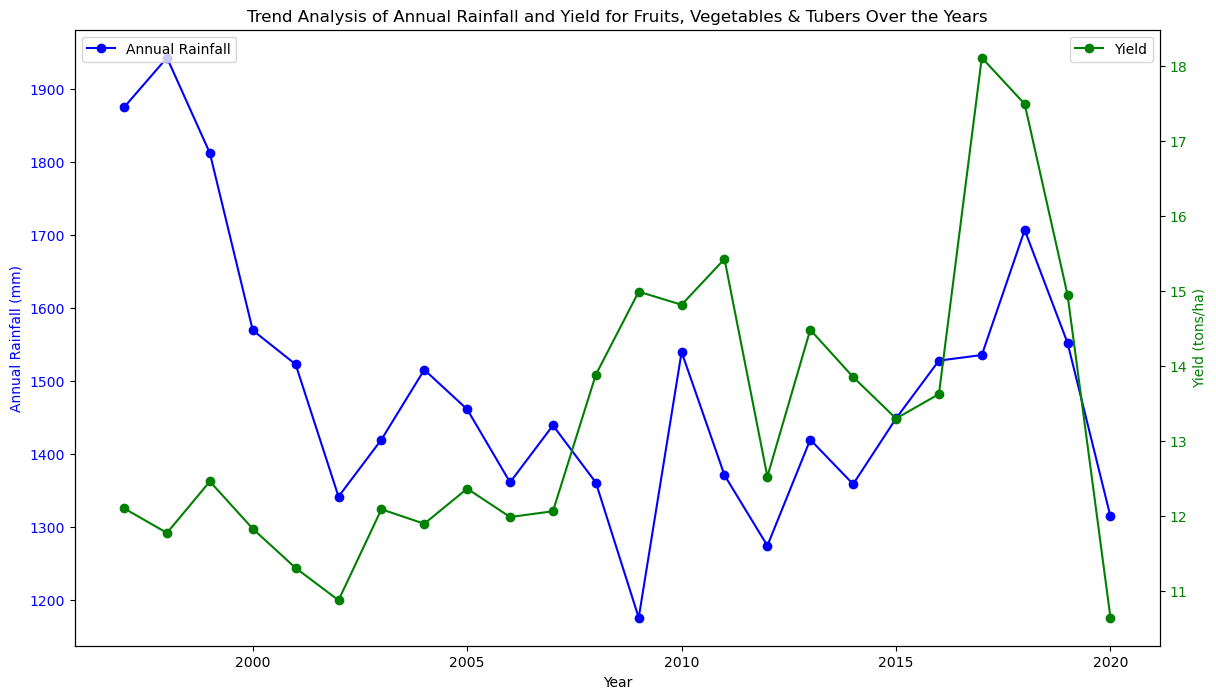

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of unique crops
crops = df['Crop'].unique()

# Loop through each crop and perform the analysis
for crop in crops:
    # Filter data for the current crop
    crop_data = df[df['Crop'] == crop]

    # Group the data by year and calculate mean values
    annual_data = crop_data.groupby('Crop_Year').agg({
        'Annual_Rainfall': 'mean',
        'Yield': 'mean'
    }).reset_index()

    # Set up the figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot annual rainfall
    ax1.plot(annual_data['Crop_Year'], annual_data['Annual_Rainfall'], color='blue', marker='o', label='Annual Rainfall')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Annual Rainfall (mm)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for crop yield
    ax2 = ax1.twinx()
    ax2.plot(annual_data['Crop_Year'], annual_data['Yield'], color='green', marker='o', label='Yield')
    ax2.set_ylabel('Yield (tons/ha)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title and legend
    plt.title(f'Trend Analysis of Annual Rainfall and Yield for {crop} Over the Years')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()


#### Following curves clearly depicts the variation of different types of crop's yield w.r.t. annual precipitation 
**CASH CROPS-**

- **For Cash Crops the yield was revolving around ~15 tons/hectares before 2020 but in the recent years the yield of Cash Crops have increased drastically**
- **It is difficult to conclude that the rainfall impacts the yield of the Cash Crop in any way because the trend shows that at some point of time the yield is more even though the rainfall is really less and for most of the early years the yield is close to constant regardless of the amount of rainfall**

**PULSES-**

- **For Pulses the yield was fair enough and revolving around ~0.6 tons/hectares to 0.8 tons/hectares before 2010 but in the past decade the yield of Pulses have slightly increased and now ranges from > 0.8 tons/hectares**
- **Also, it is really difficult to visualize the impact of rainfall on the yield of pulses from this plot. Better observation can be seen in the scatter plot.

**OILSEEDS**

- **For oilseeds the yield has increased over the past years and now ranging between 0.8 to 1 ton/hectares but in the recent years the yield is found to be decreasing.**
- **Also, it is really difficult to visualize the impact of rainfall on the yield of Oilseeds from this plot. Better observation can be seen in the scatter plot.**

**SPICES**
- **For spices the yield has been significantly improved over the the years but in the very recent years the yield is found to be dipping but the impact of rainfall on the yield cannot be confirmed from the plot**

**Cereals and Grains**
- **There is no clear observation for this category as it has always remained to be fluctuating mostly in the ranges between 1.6 to 2 tons/hectares and the impact of rainfall on the yield cannot be confirmed for this category as it does not actually impact this category of crops. (Also can be verified using the scatter plot)**

**Fruits, Vegetables and Tubers**
- **For this category the yield is found to be fluctuating and compared to 90's-2000's data, the yield is observed to be dropped slighlty**



**The impact of rainfall on the yield of crops seems to be very minimal as there is hardly any clear trend between the annual precipitation and crop's categories. Hence, brings the need of statistical methods to confirm the hypothesis.**

- **Tests we will be using = T-test and Correlation**

### Correlation between Annual Rainfall and Yield

In [23]:
##Correlation
df.corr()


Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year         1.000000 -0.035445   -0.001177        -0.010166    0.011331   
Area             -0.035445  1.000000    0.332368        -0.107896    0.973253   
Production       -0.001177  0.332368    1.000000        -0.071539    0.348435   
Annual_Rainfall  -0.010166 -0.107896   -0.071539         1.000000   -0.111606   
Fertilizer        0.011331  0.973253    0.348435        -0.111606    1.000000   
Pesticide        -0.004555  0.973503    0.322454        -0.099326    0.954992   
Yield             0.019036 -0.006204    0.343220        -0.027280   -0.004486   

                 Pesticide     Yield  
Crop_Year        -0.004555  0.019036  
Area              0.973503 -0.006204  
Production        0.322454  0.343220  
Annual_Rainfall  -0.099326 -0.027280  
Fertilizer        0.954992 -0.004486  
Pesticide         1.000000 -0.004689  
Yield            -0.004689  1.000000

- **The annual rainfall and Yield has a very low correlation between them but it is important to note that the correlation between rainfall and yield is negative and hence it can concluded that the rainfall impacts the yield of the crop's very slightly and in the negative manner**

### T-test to confirm the hypothesis

In [24]:
import pandas as pd
from scipy.stats import ttest_ind
import tabulate

# Assuming the DataFrame is named df and includes 'Crop', 'Annual_Rainfall', and 'Yield' columns

# List to store the results
results = []

# Get the list of unique crops
crops = df['Crop'].unique()

# Loop through each crop and perform the T-test
for crop in crops:
    # Filter data for the current crop
    crop_data = df[df['Crop'] == crop]
    
    # Define high and low rainfall based on the median value
    median_rainfall = crop_data['Annual_Rainfall'].median()

    high_rainfall = crop_data[crop_data['Annual_Rainfall'] > median_rainfall]
    low_rainfall = crop_data[crop_data['Annual_Rainfall'] <= median_rainfall]

    # Perform an independent two-sample T-test on the yields of high vs. low rainfall years
    t_stat, p_value = ttest_ind(high_rainfall['Yield'], low_rainfall['Yield'], equal_var=False)

    # Determine if the crop is impacted by rainfall
    is_significant = p_value < 0.05
    impact = "Impacted" if is_significant else "Not Impacted"

    # Store the results in the list
    results.append({
        'Crop': crop,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significant': is_significant,
        'Impact': impact
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a tabular format
print(tabulate.tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════════════╤═══════════════╤═════════════╤═══════════════╤══════════════╕
│    │ Crop                        │   T-statistic │     P-value │ Significant   │ Impact       │
╞════╪═════════════════════════════╪═══════════════╪═════════════╪═══════════════╪══════════════╡
│  0 │ Cash Crops                  │     -1.83255  │ 0.0670006   │ False         │ Not Impacted │
├────┼─────────────────────────────┼───────────────┼─────────────┼───────────────┼──────────────┤
│  1 │ Pulses                      │      0.162675 │ 0.870785    │ False         │ Not Impacted │
├────┼─────────────────────────────┼───────────────┼─────────────┼───────────────┼──────────────┤
│  2 │ Oilseeds                    │     -0.850088 │ 0.395368    │ False         │ Not Impacted │
├────┼─────────────────────────────┼───────────────┼─────────────┼───────────────┼──────────────┤
│  3 │ Spices                      │     -1.338    │ 0.181126    │ False         │ Not Impacted │
├────┼──────────────

- **Using the T-test it can be concluded that "Cash Crops", "Cereals & Grains" and "Fruits, Vegetables & Tubers" are the crops that are impacted because of the annual rainfall.**
- **Also, the impact of rainfall will be negative on their yield which can be confirmed by correlation**


### The "Yield" feature is a bit confusing since it is formed by production/area of land and therefore we need to study the impact of rainfall on the production of the crop

### Production of the Crop

### Net Production of crops with respect to each State

In [25]:
import pandas as pd
from tabulate import tabulate
from decimal import Decimal

# Ensure that 'Production' is numeric
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Calculate summary statistics for 'Production' by 'State'
summary_stats = df.groupby('State')['Production'].describe()

# Select and round key statistics for better readability
summary_table = summary_stats[['count', 'mean', 'min', 'max']].round(2)

# Rename columns for clarity
summary_table = summary_table.rename(columns={
    'count': 'Count', 
    'mean': 'Mean Production', 
    'min': 'Min Production', 
    'max': 'Max Production'
})

# Sort the table by 'Mean Production' in descending order
summary_table = summary_table.sort_values(by='Mean Production', ascending=False)

# Convert all values to string format with two decimal places without scientific notation
summary_table = summary_table.applymap(lambda x: str(Decimal(x).quantize(Decimal('0.01'))))

# Convert to a more visually appealing table
print(tabulate(summary_table, headers='keys', tablefmt='fancy_grid'))


╒═══════════════════╤═════════╤═══════════════════╤══════════════════╤══════════════════╕
│ State             │   Count │   Mean Production │   Min Production │   Max Production │
╞═══════════════════╪═════════╪═══════════════════╪══════════════════╪══════════════════╡
│ Uttar Pradesh     │     825 │       5.38495e+06 │               15 │      1.79698e+08 │
├───────────────────┼─────────┼───────────────────┼──────────────────┼──────────────────┤
│ Maharashtra       │     760 │       2.47175e+06 │               96 │      9.15381e+07 │
├───────────────────┼─────────┼───────────────────┼──────────────────┼──────────────────┤
│ Punjab            │     396 │       1.97361e+06 │              100 │      1.8262e+07  │
├───────────────────┼─────────┼───────────────────┼──────────────────┼──────────────────┤
│ Tamil Nadu        │     806 │       1.27464e+06 │                0 │      4.80373e+07 │
├───────────────────┼─────────┼───────────────────┼──────────────────┼──────────────────┤
│ Gujarat 

### Plot to showcase the above analysis

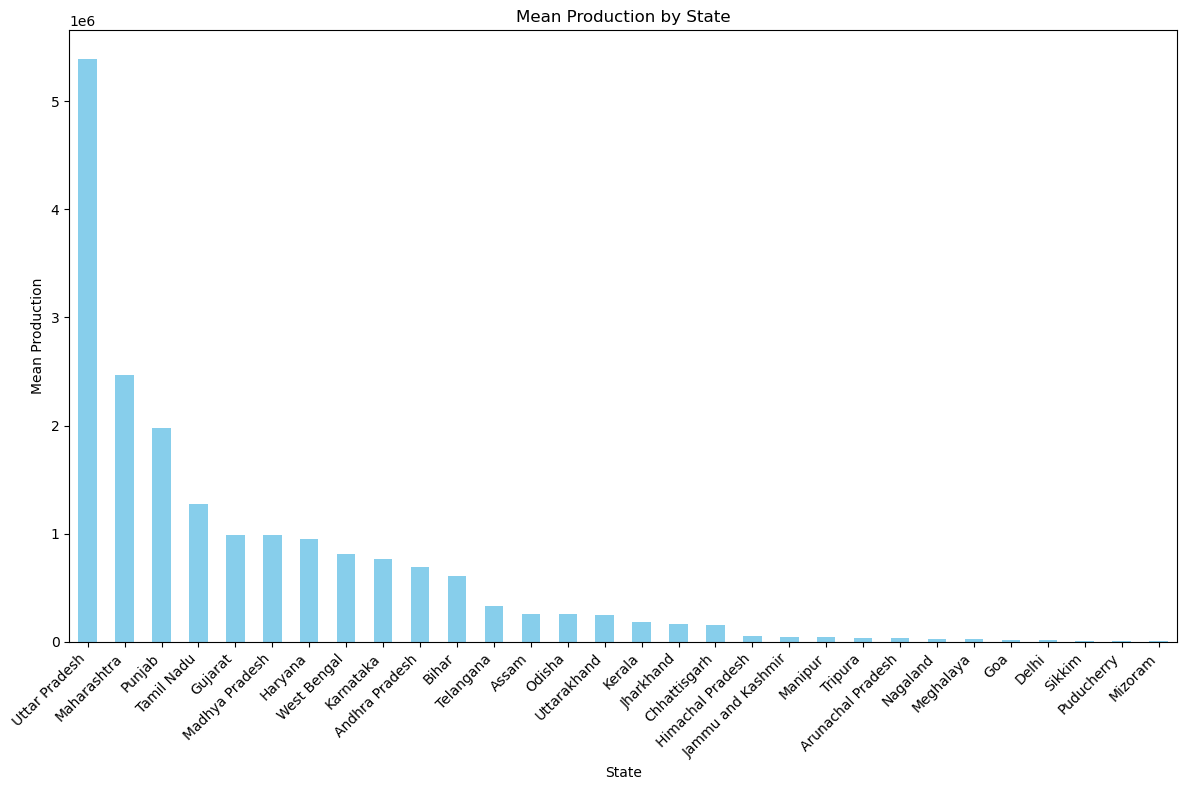

In [26]:
# Ensure that 'Production' is numeric
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Calculate the mean production by state
mean_production_by_state = df.groupby('State')['Production'].mean().sort_values(ascending=False)

# Plotting the Mean Production by State
plt.figure(figsize=(12, 8))
mean_production_by_state.plot(kind='bar', color='skyblue')
plt.title('Mean Production by State')
plt.xlabel('State')
plt.ylabel('Mean Production')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- **The Top 5 states with respect to the Net Production (Mean Production) of crops are --> 'Uttar Pradesh', 'Maharashtra', 'Punjab', 'Tamil Nadu' and 'Gujrat'**
- **The y-scale here is 10^6 (10 raise to the power 6) --> Mega Tons**

### Reducing the categories of state - For better understanding

In [27]:
df['State'].value_counts()

Karnataka            1410
Andhra Pradesh       1237
West Bengal          1071
Chhattisgarh          908
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Gujarat               815
Tamil Nadu            806
Maharashtra           760
Odisha                760
Uttarakhand           726
Assam                 709
Nagaland              684
Puducherry            650
Meghalaya             649
Haryana               622
Himachal Pradesh      616
Jammu and Kashmir     609
Kerala                510
Manipur               444
Tripura               438
Mizoram               404
Punjab                396
Telangana             392
Arunachal Pradesh     288
Jharkhand             270
Goa                   226
Sikkim                221
Delhi                 203
Name: State, dtype: int64

In [28]:
len(df['State'].value_counts())

30

### Region wise 'Production', 'Annual Rainfall' and 'Yield'

In [29]:
import pandas as pd

# Create a mapping of states to regions
region_mapping = {
    'Karnataka': 'Southern Region',
    'Andhra Pradesh': 'Southern Region',
    'West Bengal': 'Eastern Region',
    'Chhattisgarh': 'Central Region',
    'Bihar': 'Eastern Region',
    'Madhya Pradesh': 'Central Region',
    'Uttar Pradesh': 'Northern Region',
    'Gujarat': 'Western Region',
    'Tamil Nadu': 'Southern Region',
    'Maharashtra': 'Western Region',
    'Odisha': 'Eastern Region',
    'Uttarakhand': 'Northern Region',
    'Assam': 'Eastern Region',
    'Nagaland': 'Eastern Region',
    'Puducherry': 'Southern Region',
    'Meghalaya': 'Eastern Region',
    'Haryana': 'Northern Region',
    'Himachal Pradesh': 'Northern Region',
    'Jammu and Kashmir': 'Northern Region',
    'Kerala': 'Southern Region',
    'Manipur': 'Eastern Region',
    'Tripura': 'Eastern Region',
    'Mizoram': 'Eastern Region',
    'Punjab': 'Northern Region',
    'Telangana': 'Southern Region',
    'Arunachal Pradesh': 'Eastern Region',
    'Jharkhand': 'Eastern Region',
    'Goa': 'Western Region',
    'Sikkim': 'Eastern Region',
    'Delhi': 'Northern Region'
}

# Assuming 'df' is your DataFrame and has a 'State' column
df['Region'] = df['State'].map(region_mapping)

# Now you can group by 'Region' and calculate the mean production, annual rainfall, and yield
region_grouped = df.groupby('Region').agg({
    'Production': 'mean', 
    'Annual_Rainfall': 'mean', 
    'Yield': 'mean'
})

# Display the grouped data
print(region_grouped)


                   Production  Annual_Rainfall     Yield
Region                                                  
Central Region   5.576651e+05      1139.840160  2.693334
Eastern Region   2.815248e+05      1971.111777  3.549730
Northern Region  1.515838e+06       928.557414  4.266480
Southern Region  6.381306e+05      1266.803276  5.876952
Western Region   1.494198e+06      1271.344094  5.223548


### Production and its dependence on over the mentioned ranges Annual Rainfall for each state in our ountry

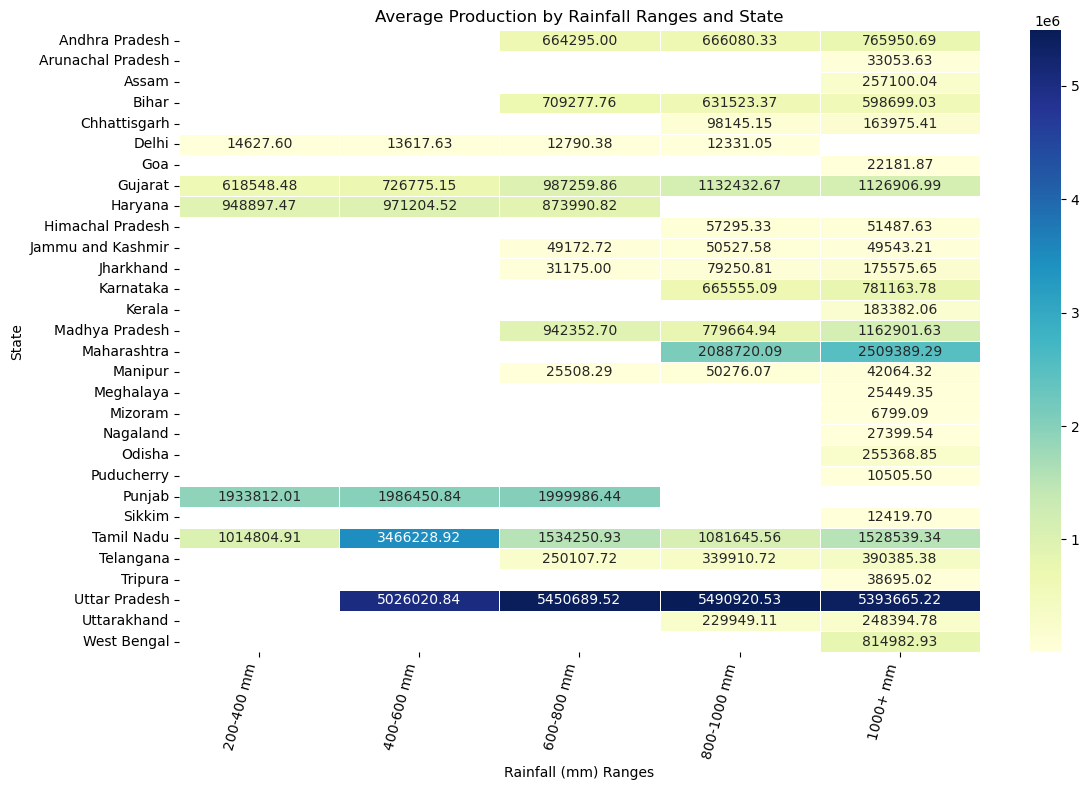

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create rainfall bins
df['Rainfall_bins'] = pd.cut(df['Annual_Rainfall'], bins=[0, 200, 400, 600, 800, 1000, df['Annual_Rainfall'].max()],
                             labels=['0-200 mm', '200-400 mm', '400-600 mm', '600-800 mm', '800-1000 mm', '1000+ mm'])

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='State', columns='Rainfall_bins', values='Production', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Production by Rainfall Ranges and State')
plt.xlabel('Rainfall (mm) Ranges')
plt.ylabel('State')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


### Detailed Analysis by State:

**Andhra Pradesh:**

200-400 mm: 664,295.00 tons

400-600 mm: 666,080.33 tons

600-800 mm: 765,950.69 tons

1000+ mm: 330,153.63 tons

**Conclusion:** Andhra Pradesh exhibits stable production across moderate rainfall ranges, with a slight peak in the 600-800 mm range. However, production drops significantly with very high rainfall (1000+ mm).

**Arunachal Pradesh:**

400-600 mm: 257,100.04 tons

**Conclusion:** Arunachal Pradesh has minimal agricultural production, with a noticeable output only in the 400-600 mm rainfall range.

**Assam:**

200-400 mm: 709,277.76 tons

400-600 mm: 631,523.37 tons

600-800 mm: 598,699.03 tons

1000+ mm: 981,451.15 tons

**Conclusion:** Assam shows a relatively stable production across various rainfall ranges, with a slight decrease as rainfall increases, except for a spike in the 1000+ mm range.

**Bihar:**

200-400 mm: 14,627.60 tons

400-600 mm: 13,617.63 tons

600-800 mm: 12,790.38 tons

800-1000 mm: 12,331.05 tons

**Conclusion:** Bihar has very low production across all rainfall ranges, indicating challenges in agricultural productivity.

**Chhattisgarh:**

400-600 mm: 16,397.41 tons

600-800 mm: 22,181.87 tons

1000+ mm: 255,368.85 tons

**Conclusion:** Chhattisgarh shows minimal production in lower rainfall ranges but a significant increase with very high rainfall (1000+ mm).

**Delhi:**

200-400 mm: 22,181.87 tons

**Conclusion:** Delhi shows minimal production, which is expected given its urban nature.

**Goa:**

200-400 mm: 22,181.87 tons

**Conclusion:** Similar to Delhi, Goa has minimal agricultural production.

**Gujarat:**

200-400 mm: 618,548.48 tons

400-600 mm: 726,775.15 tons

600-800 mm: 987,259.86 tons

800-1000 mm: 1,132,432.67 tons

1000+ mm: 1,129,069.99 tons

**Conclusion:** Gujarat shows an increasing trend in production with higher rainfall, peaking in the 800-1000 mm range.

**Haryana:**

200-400 mm: 948,897.47 tons

400-600 mm: 971,204.52 tons

600-800 mm: 873,990.82 tons

**Conclusion:** Haryana achieves its highest production in the 400-600 mm range, indicating that moderate rainfall is optimal for its agricultural output.

**Himachal Pradesh:**

600-800 mm: 57,295.33 tons

800-1000 mm: 51,487.63 tons

**Conclusion:** Himachal Pradesh has low production levels, consistent with its mountainous terrain that limits large-scale agriculture.

**Jammu and Kashmir:**

600-800 mm: 49,172.72 tons

800-1000 mm: 50,527.58 tons

1000+ mm: 49,543.21 tons

**Conclusion:** Jammu and Kashmir exhibit consistent but low production across higher rainfall ranges.

**Jharkhand:**

200-400 mm: 31,175.00 tons

400-600 mm: 79,250.81 tons

1000+ mm: 175,575.65 tons

**Conclusion:** Jharkhand shows a significant increase in production with very high rainfall (1000+ mm), indicating its dependency on substantial rainfall.

**Karnataka:**

600-800 mm: 665,555.09 tons

1000+ mm: 781,163.78 tons

**Conclusion:** Karnataka shows increased production with higher rainfall, particularly in the 1000+ mm range.

**Kerala:**

600-800 mm: 1,183,382.06 tons

**Conclusion:** Kerala relies heavily on high rainfall, with significant production in the 600-800 mm range.

**Madhya Pradesh:**

400-600 mm: 942,352.70 tons

600-800 mm: 779,664.94 tons

800-1000 mm: 1,162,901.63 tons

1000+ mm: 208,8720.09 tons

**Conclusion:** Madhya Pradesh shows high production across a wide range of rainfall levels, peaking in the 1000+ mm range.

**Maharashtra:**

800-1000 mm: 2,088,720.09 tons

1000+ mm: 2,509,389.29 tons

**Conclusion:** Maharashtra achieves its highest production with very high rainfall (1000+ mm).

**Manipur:**

400-600 mm: 25,508.29 tons

1000+ mm: 42,064.32 tons

**Conclusion:** Manipur shows minimal agricultural activity, with slightly better production under very high rainfall.

**Meghalaya:**

400-600 mm: 6,799.09 tons

**Conclusion:** Meghalaya has very low production, consistent with its hilly terrain.

**Mizoram:**

400-600 mm: 27,399.54 tons

**Conclusion:** Mizoram, similar to Meghalaya, has limited agricultural production.

**Nagaland:**

600-800 mm: 25,536.67 tons

**Conclusion:** Nagaland also shows minimal agricultural activity.

**Odisha:**

600-800 mm: 255,368.85 tons

**Conclusion:** Odisha shows low to moderate production with higher rainfall, peaking in the 600-800 mm range.

**Puducherry:**

200-400 mm: 1,933,812.01 tons

400-600 mm: 1,986,450.84 tons

600-800 mm: 1,999,986.44 tons

**Conclusion:** Puducherry has substantial production across all moderate rainfall levels, peaking in the 600-800 mm range.

**Punjab:**

200-400 mm: 1,933,812.01 tons

400-600 mm: 1,986,450.84 tons

600-800 mm: 1,999,986.44 tons

**Conclusion:** Punjab shows extremely high production across all rainfall ranges, indicating strong agricultural productivity.

**Sikkim:**

400-600 mm: 12,419.70 tons

**Conclusion:** Sikkim has very low production, consistent with its mountainous geography.

**Tamil Nadu:**

200-400 mm: 1,014,804.91 tons

400-600 mm: 3,466,228.92 tons

600-800 mm: 1,534,250.93 tons

800-1000 mm: 1,081,645.56 tons

**Conclusion:** Tamil Nadu shows strong production across all rainfall ranges, with a peak in the 400-600 mm range.

**Telangana:**

400-600 mm: 250,107.72 tons

600-800 mm: 339,910.72 tons

1000+ mm: 390,385.38 tons

**Conclusion:** Telangana has moderate production, increasing with higher rainfall.

**Tripura:**

800-1000 mm: 38,695.02 tons

**Conclusion:** Tripura has minimal agricultural output, with slightly better production under moderate rainfall.

**Uttar Pradesh:**

200-400 mm: 5,026,020.84 tons

400-600 mm: 5,450,689.52 tons

600-800 mm: 5,490,920.53 tons

**Conclusion:** Uttar Pradesh is a powerhouse in agricultural production, with extremely high output across all rainfall ranges.

**Uttarakhand:**

1000+ mm: 814,982.93 tons

**Conclusion:** Uttarakhand, with its mountainous terrain, shows moderate production in very high rainfall conditions.

**West Bengal:**

1000+ mm: 229,949.11 tons

**Conclusion:** West Bengal shows strong production under very high rainfall conditions.

### Overall Conclusion:

**High Production States:** Punjab and Uttar Pradesh stand out as the leading states in agricultural production across various rainfall levels, with extremely high output.

**Rainfall Dependence:** States like Maharashtra, Tamil Nadu, and Karnataka show a strong dependence on higher rainfall (800-1000 mm and above) for optimal production.

**Low Output States:** States like Arunachal Pradesh, Mizoram, and Nagaland exhibit very low production across all rainfall ranges, likely due to geographic and climatic challenges.

**Moderate Output States:** States such as Gujarat, Madhya Pradesh, and Tamil Nadu maintain high production across multiple rainfall levels, showcasing their agricultural resilience.

**Geographic Challenges:** States in mountainous or hilly regions (e.g., Himachal Pradesh, Sikkim, Uttarakhand) generally exhibit lower production, reflecting the limitations imposed by their terrain.

## Problem Statement 2: Fertilizer and Pesticide Usage Efficiency

**Objective:** Evaluate the efficiency of fertilizer and pesticide usage on crop yields across different regions and crops.

**Hypotheses:**

There is a diminishing return on crop yield with increased fertilizer and pesticide usage beyond a certain threshold.
Regions with optimized fertilizer and pesticide usage have higher crop yields.


In [31]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0  Cash Crops       1997  Whole Year   Assam  73814.0       56708   
1      Pulses       1997  Kharif       Assam   6637.0        4685   
2    Oilseeds       1997  Kharif       Assam    796.0          22   
4  Cash Crops       1997  Kharif       Assam   1739.0         794   
5      Spices       1997  Whole Year   Assam  13587.0        9073   

   Annual_Rainfall  Fertilizer  Pesticide     Yield Rainfall_bins  \
0           2051.4  7024878.38   22882.34  0.796087      1000+ mm   
1           2051.4   631643.29    2057.47  0.710435      1000+ mm   
2           2051.4    75755.32     246.76  0.238333      1000+ mm   
4           2051.4   165500.63     539.09  0.420909      1000+ mm   
5           2051.4  1293074.79    4211.97  0.643636      1000+ mm   

           Region  
0  Eastern Region  
1  Eastern Region  
2  Eastern Region  
4  Eastern Region  
5  Eastern Region

### Fertilizer

In [32]:
df['Fertilizer'].describe() #the scale of fertilizer varies from 10's to 10^9 (10 raise to the power 9)

count    1.939000e+04
mean     2.419942e+07
std      9.558227e+07
min      5.417000e+01
25%      1.903106e+05
50%      1.230931e+06
75%      9.968288e+06
max      4.835407e+09
Name: Fertilizer, dtype: float64

Text(0.5, 1.0, 'Distribution of Fertilizer Usage')

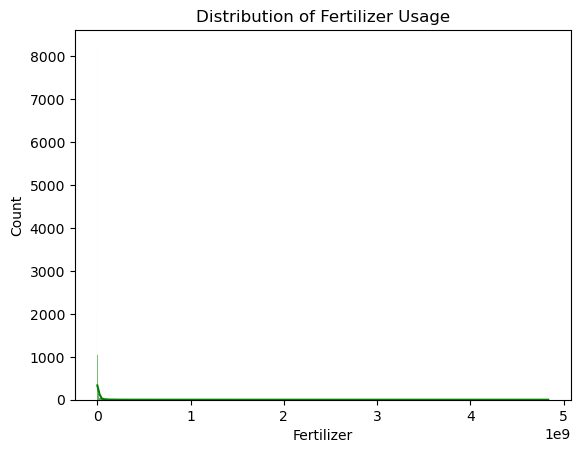

In [33]:
# Distribution Plot for Fertilizer Usage
plt.plot()
sns.histplot(df['Fertilizer'], kde=True, color='green')
plt.title('Distribution of Fertilizer Usage')


**Poor Graph because of the drastically varying scale**

In [34]:
np.log10(df['Fertilizer']).describe() #the scale of fertilizer varies from 10's to 10^9 (10 raise to the power 9)

count    19390.000000
mean         6.063458
std          1.287442
min          1.733759
25%          5.279463
50%          6.090234
75%          6.998621
max          9.684433
Name: Fertilizer, dtype: float64

### Logarithmic Distribution (Base 10) of 'Fertilizer'

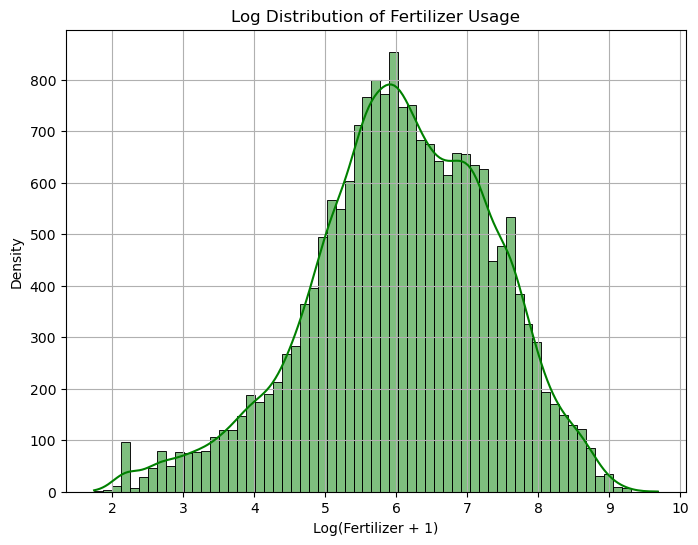

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply logarithmic transformation to Fertilizer data
df['Log_Fertilizer'] = np.log10(df['Fertilizer'] + 1)  # Adding 1 to avoid log(0)

# Plot the log distribution of Fertilizer
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_Fertilizer'], kde=True, color='green')
plt.title('Log Distribution of Fertilizer Usage')
plt.xlabel('Log(Fertilizer + 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### Most of the data observations belong to the range of 10^4 to 10^8 kilograms (kgs) of Fertilizers

### Pesticide

In [36]:
df['Pesticide'].describe() #the scale of pesticide varies from 10^(-1.04) to 10^7 (10 raise to the power 7)

count    1.939000e+04
mean     4.905131e+04
std      2.147486e+05
min      9.000000e-02
25%      3.619050e+02
50%      2.416710e+03
75%      1.992605e+04
max      1.575051e+07
Name: Pesticide, dtype: float64

In [37]:
np.log10(df['Pesticide']).describe()

count    19390.000000
mean         3.353306
std          1.295601
min         -1.045757
25%          2.558595
50%          3.383225
75%          4.299421
max          7.197295
Name: Pesticide, dtype: float64

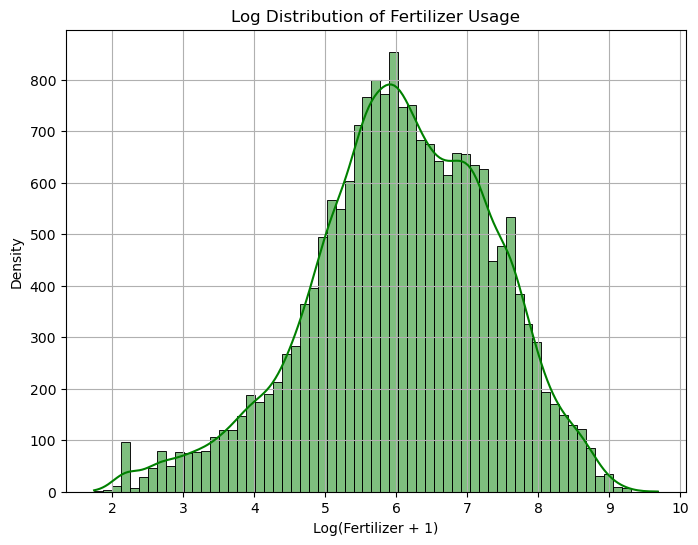

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply logarithmic transformation to Fertilizer data
df['Log_Fertilizer'] = np.log10(df['Fertilizer'] + 1)  # Adding 1 to avoid log(0)

# Plot the log distribution of Fertilizer
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_Fertilizer'], kde=True, color='green')
plt.title('Log Distribution of Fertilizer Usage')
plt.xlabel('Log(Fertilizer + 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### Most of the observations belongs to the range of fertilizers from 10^4 to 10^8

### Studying the dependency of Fertilizers and Pesticides on Crop Production and Yield

### Fertilizer, State and Crop Production - 

### Dependency of fertilizers on the crop type and its production with respect to each state

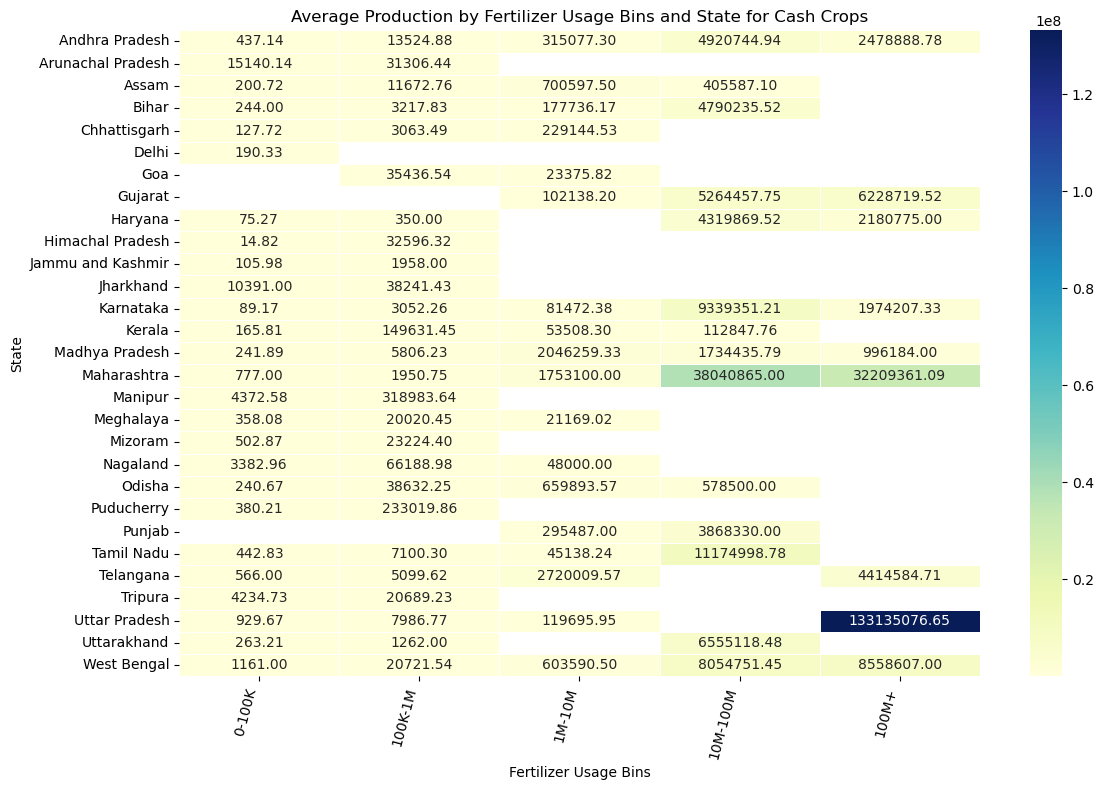

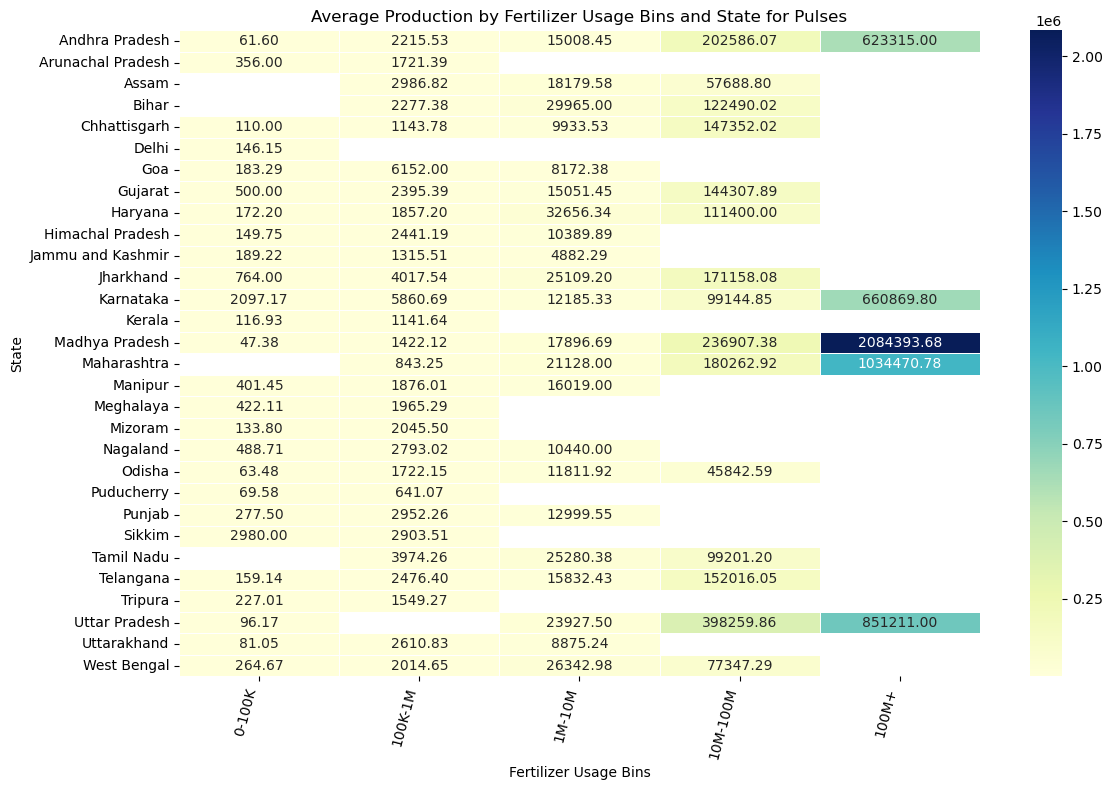

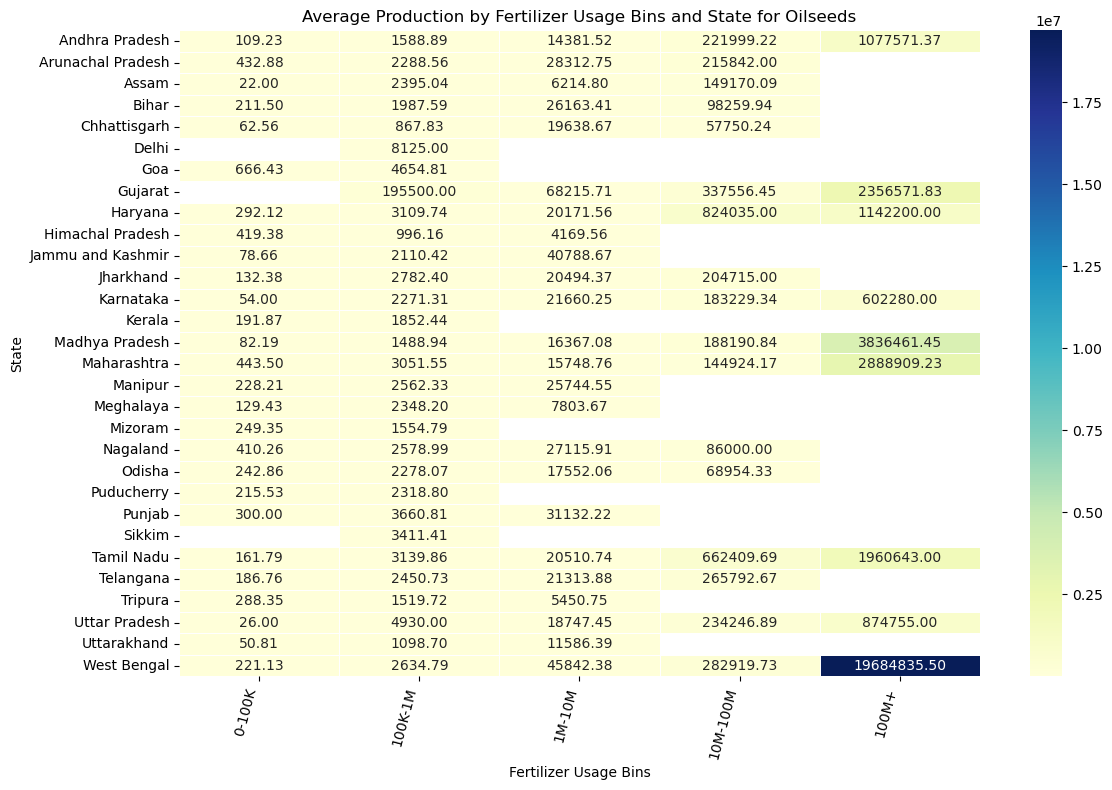

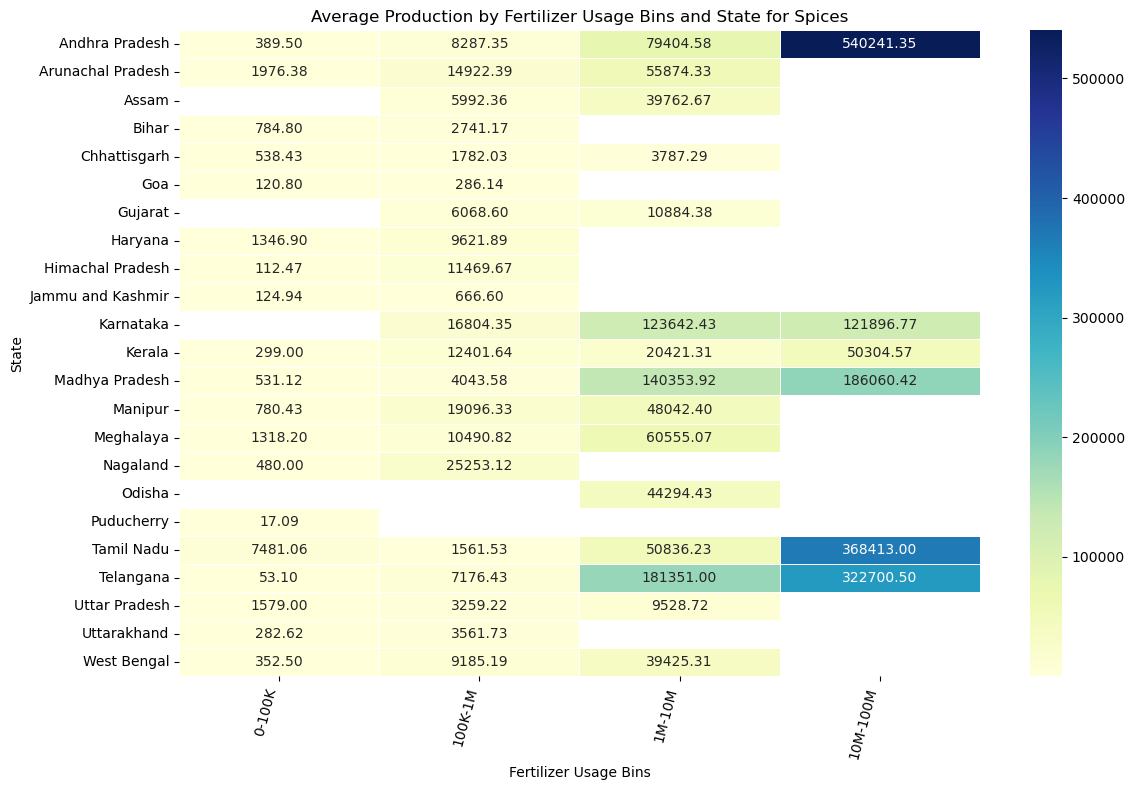

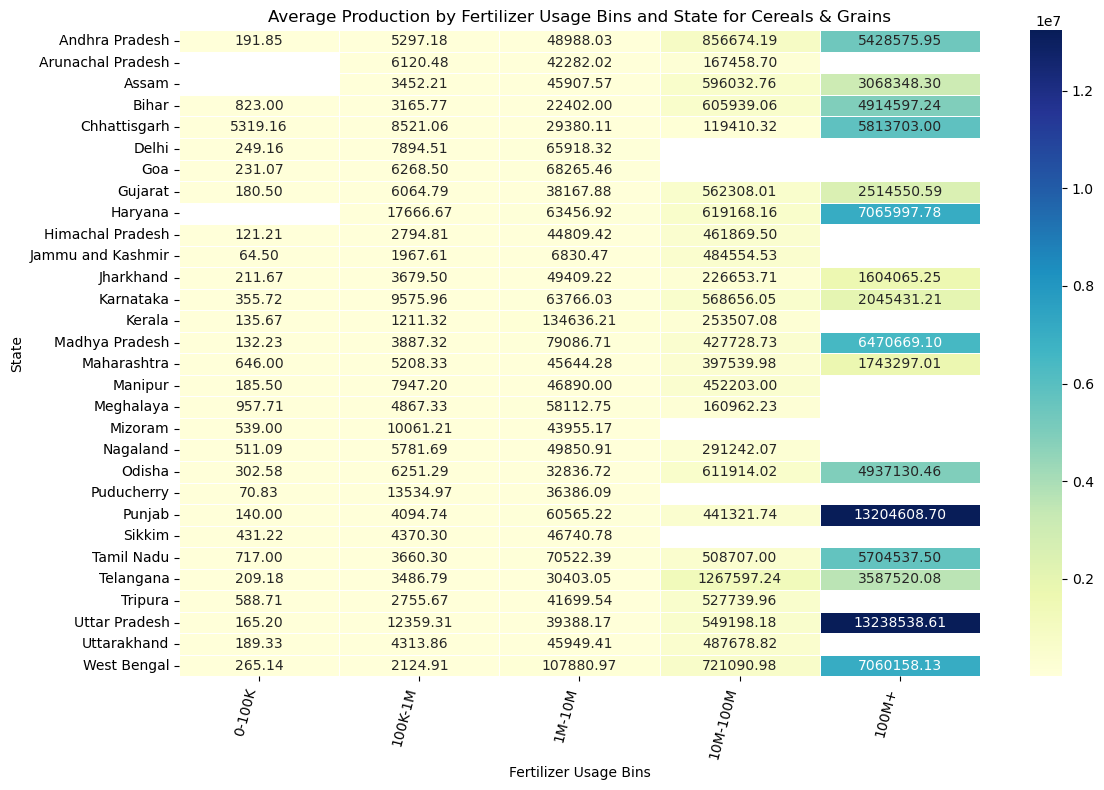

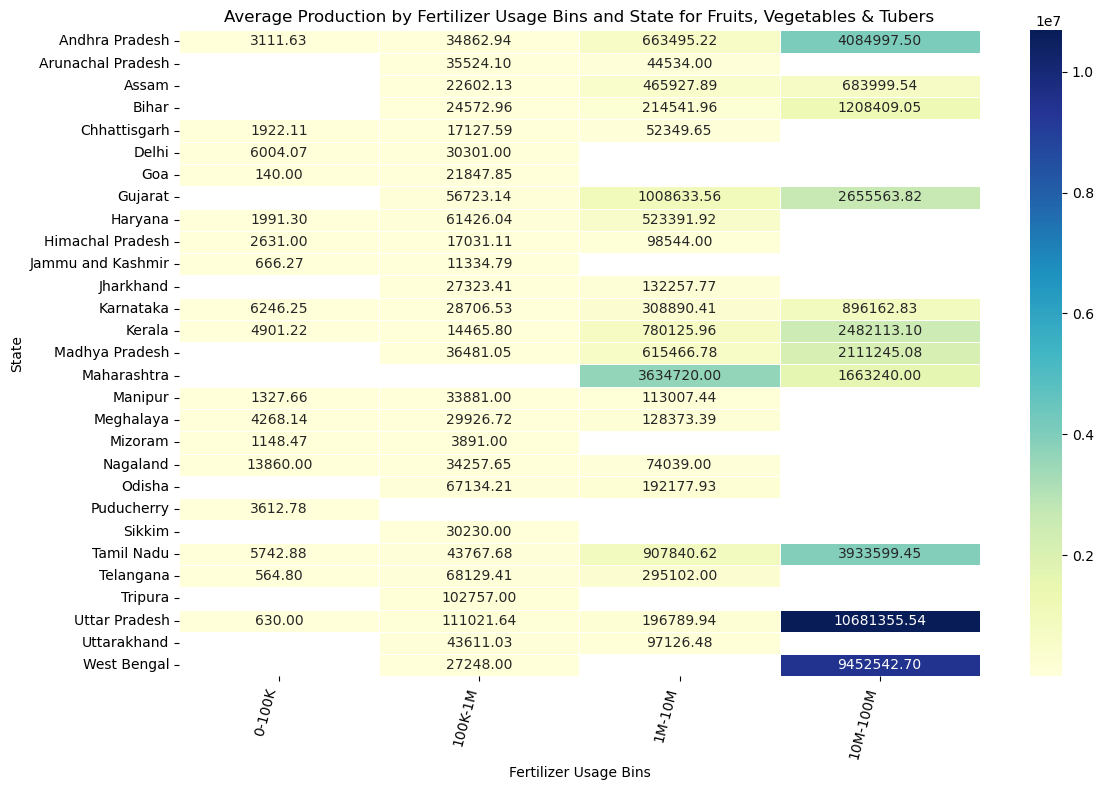

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for Fertilizer usage based on its distribution
df['Fertilizer_bins'] = pd.cut(df['Fertilizer'], 
                               bins=[0, 1e5, 1e6, 1e7, 1e8, df['Fertilizer'].max()], 
                               labels=['0-100K', '100K-1M', '1M-10M', '10M-100M', '100M+'])

# List of crops
crops = df['Crop'].unique()

# Loop through each crop and create a heatmap
for crop in crops:
    # Filter data for the current crop
    df_crop = df[df['Crop'] == crop]
    
    # Create a pivot table for the heatmap
    pivot_table = df_crop.pivot_table(index='State', columns='Fertilizer_bins', values='Production', aggfunc='mean')
    
    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
    plt.title(f'Average Production by Fertilizer Usage Bins and State for {crop}')
    plt.xlabel('Fertilizer Usage Bins')
    plt.ylabel('State')
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()


## Analysis - Likho apne app se aur dikhao

### Dependency of Pesticidess on the crop type and its production with respect to each state

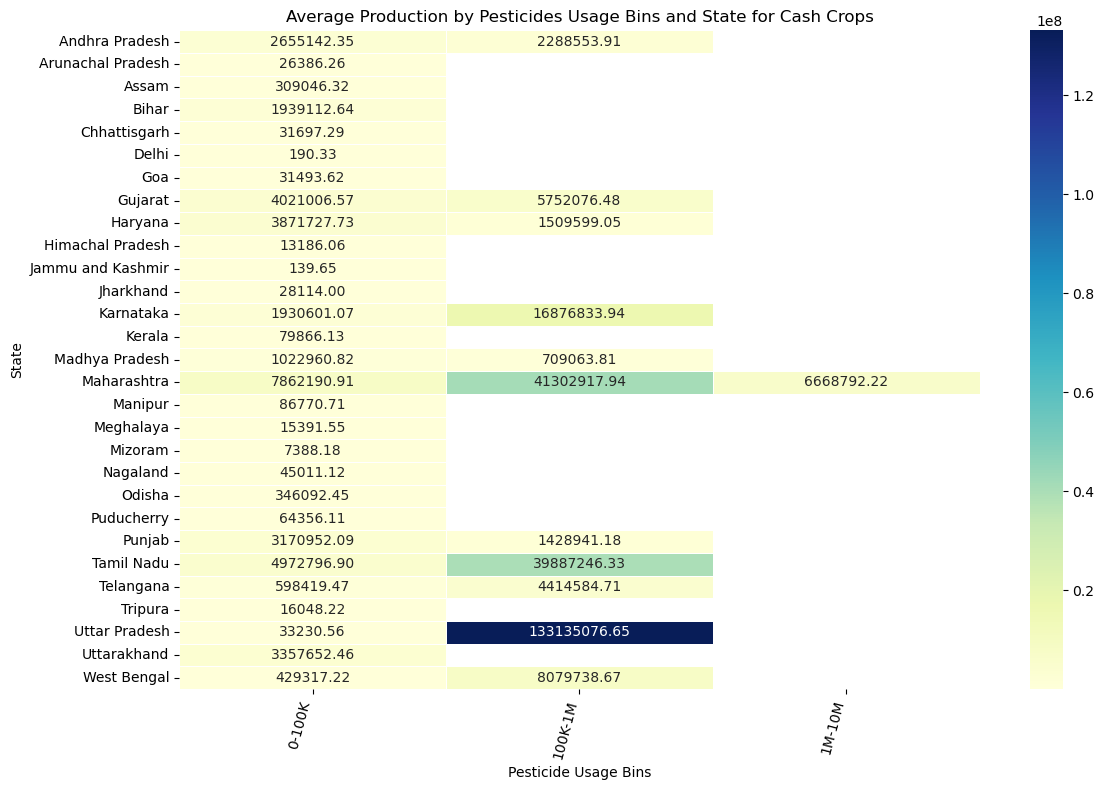

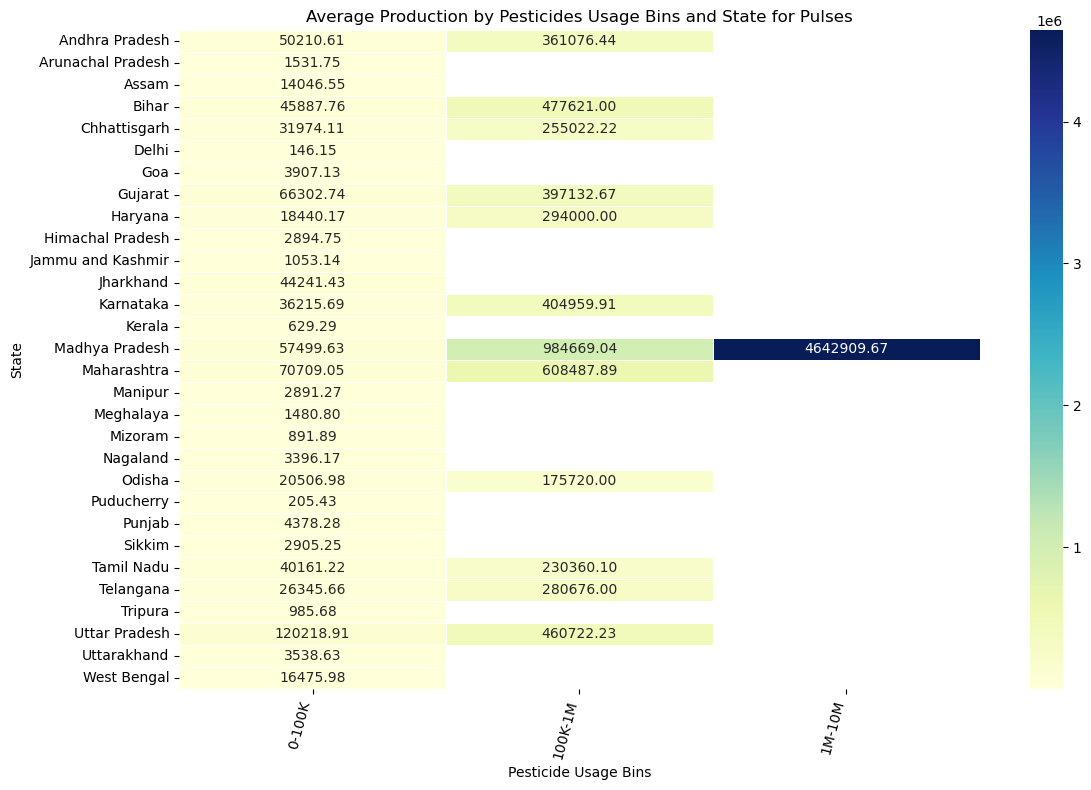

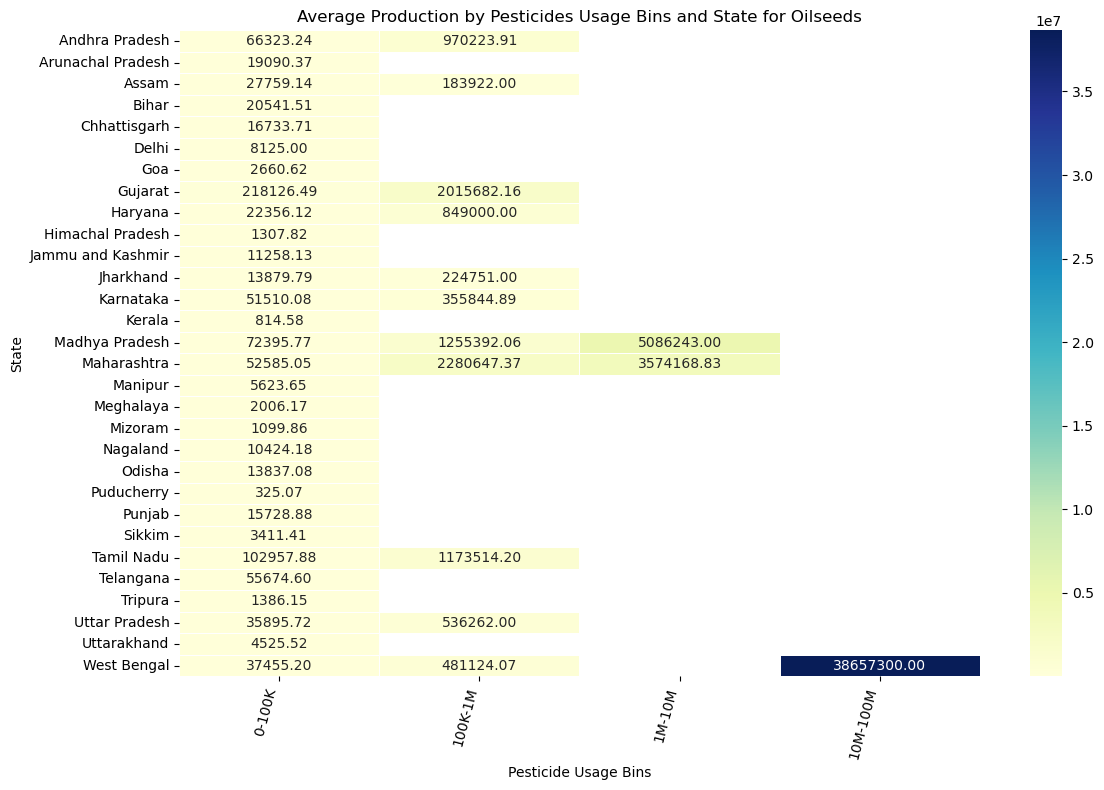

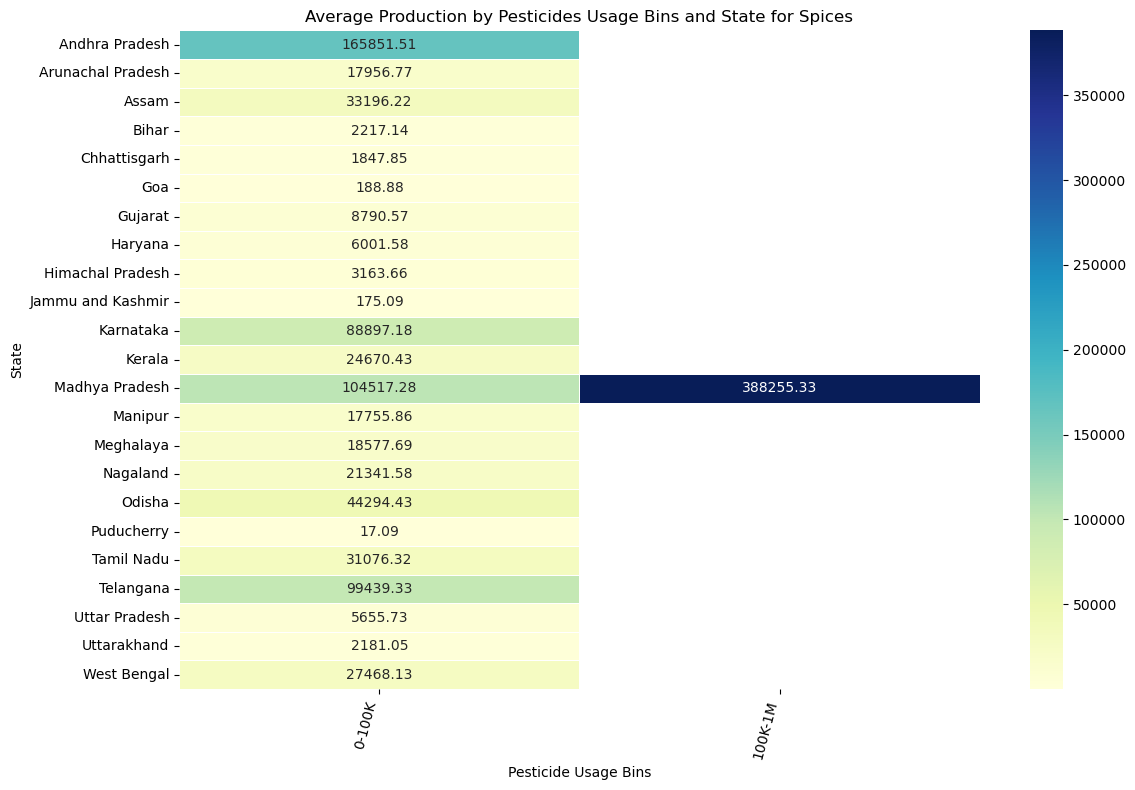

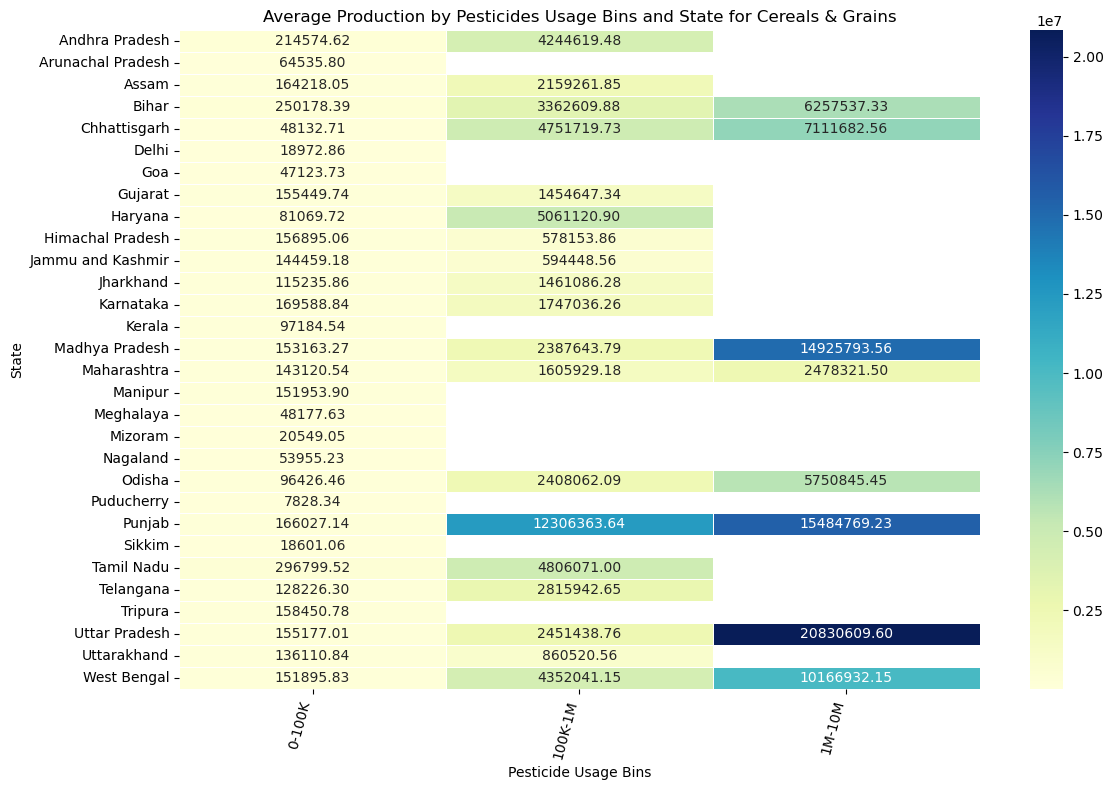

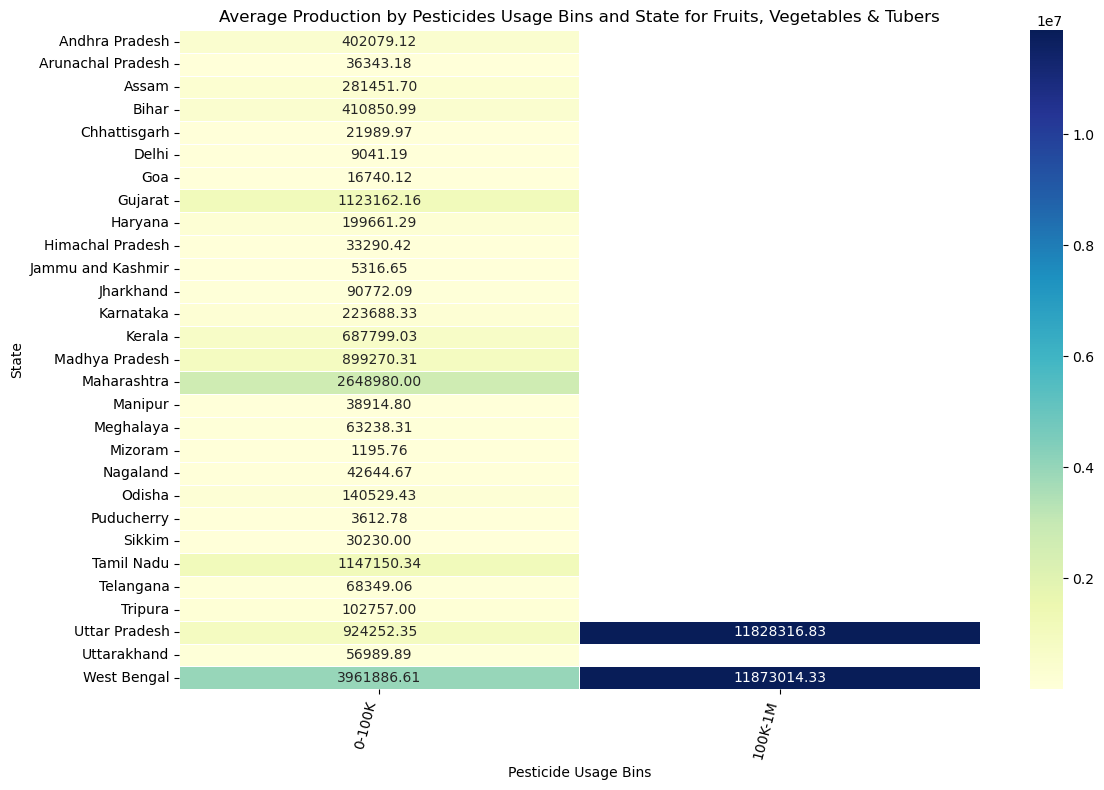

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for Fertilizer usage based on its distribution
df['Pesticide_bins'] = pd.cut(df['Pesticide'], 
                               bins=[0, 1e5, 1e6, 1e7, 1e8, df['Fertilizer'].max()], 
                               labels=['0-100K', '100K-1M', '1M-10M', '10M-100M', '100M+'])

# List of crops
crops = df['Crop'].unique()

# Loop through each crop and create a heatmap
for crop in crops:
    # Filter data for the current crop
    df_crop = df[df['Crop'] == crop]
    
    # Create a pivot table for the heatmap
    pivot_table = df_crop.pivot_table(index='State', columns='Pesticide_bins', values='Production', aggfunc='mean')
    
    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
    plt.title(f'Average Production by Pesticides Usage Bins and State for {crop}')
    plt.xlabel('Pesticide Usage Bins')
    plt.ylabel('State')
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()


### ANALYSIS -- LIKH K DE

## SIMILARLY DEPENDENCY OF FERTILIZERS AND PESTICIDES on CROP "YIELD" K LIYE AISE HI 2 HEATMAPS BANAO AUR UNKI BHI ANALYSIS LIKH K DIKHAO - Ek pesticide ka state and yield k saath aur ek fertilizer ka state aur yield k saath

########### Pehle ye upar wali dono analysis aayengi ###########

### Correlation between the given features

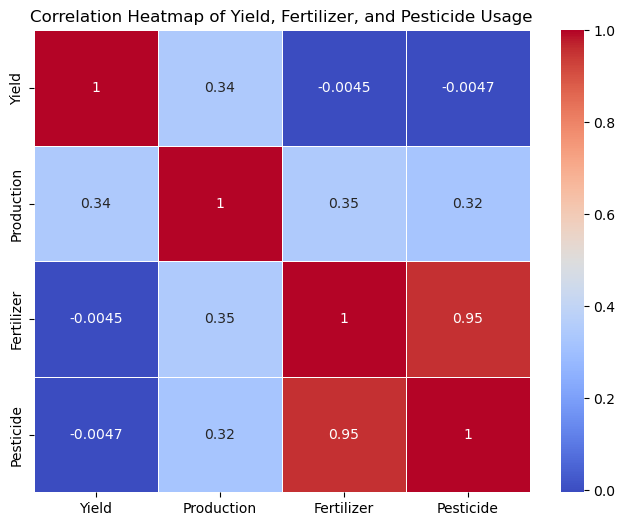

In [41]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['Yield', 'Production', 'Fertilizer', 'Pesticide']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Yield, Fertilizer, and Pesticide Usage')
plt.show()


## Problem Statement 3: Seasonal Crop Yield Variability

**Objective:** Investigate the impact of different growing seasons on crop yields and identify the best-suited crops for each season.

### Dependency of Season on the Crop Production

In [42]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0  Cash Crops       1997  Whole Year   Assam  73814.0       56708   
1      Pulses       1997  Kharif       Assam   6637.0        4685   
2    Oilseeds       1997  Kharif       Assam    796.0          22   
4  Cash Crops       1997  Kharif       Assam   1739.0         794   
5      Spices       1997  Whole Year   Assam  13587.0        9073   

   Annual_Rainfall  Fertilizer  Pesticide     Yield Rainfall_bins  \
0           2051.4  7024878.38   22882.34  0.796087      1000+ mm   
1           2051.4   631643.29    2057.47  0.710435      1000+ mm   
2           2051.4    75755.32     246.76  0.238333      1000+ mm   
4           2051.4   165500.63     539.09  0.420909      1000+ mm   
5           2051.4  1293074.79    4211.97  0.643636      1000+ mm   

           Region  Log_Fertilizer Fertilizer_bins Pesticide_bins  
0  Eastern Region        6.846639          1M-10M         0-100K  
1  Eastern Region        5.800473         100K-1M         0-100K  
2  Eastern Region        4.879419          0-100K         0-100K  
4  Eastern Region        5.218802         100K-1M         0-100K  
5  Eastern Region        6.111624          1M-10M         0-100K

In [43]:
df['Season'].value_counts()

Kharif         8170
Rabi           5690
Whole Year     3538
Summer         1190
Autumn          413
Winter          389
Name: Season, dtype: int64

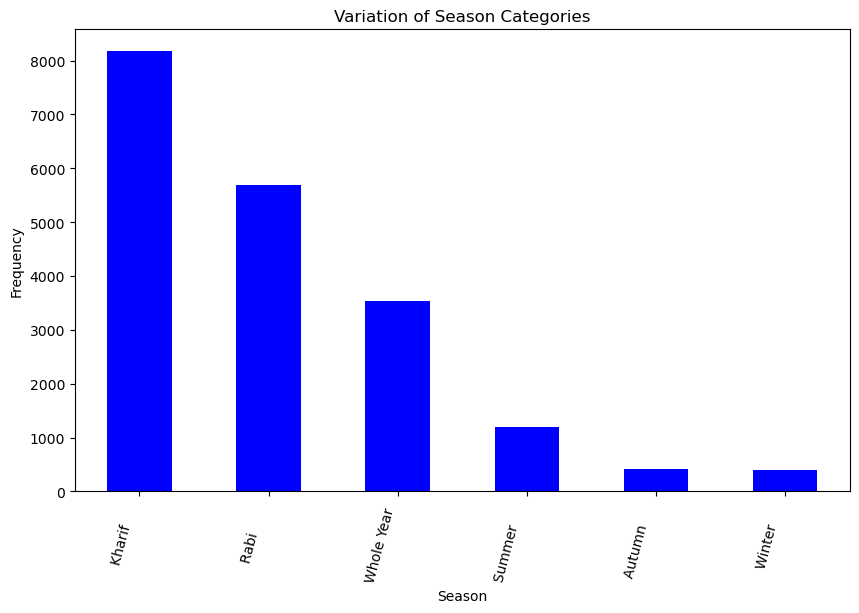

In [44]:
import matplotlib.pyplot as plt

# Assuming df['Crop'] contains the categorized crops
crop_counts = df['Season'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
crop_counts.plot(kind='bar', color='blue')
plt.title('Variation of Season Categories')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=75, ha='right')
plt.show()


- **Most of the observations of our data (crops) belongs to the kharif season, followed by Rabi season and so on**
- **Autumn and Winter are rare seasons**

### Bivariate Analysis --> Seson and Production + Season and Yield

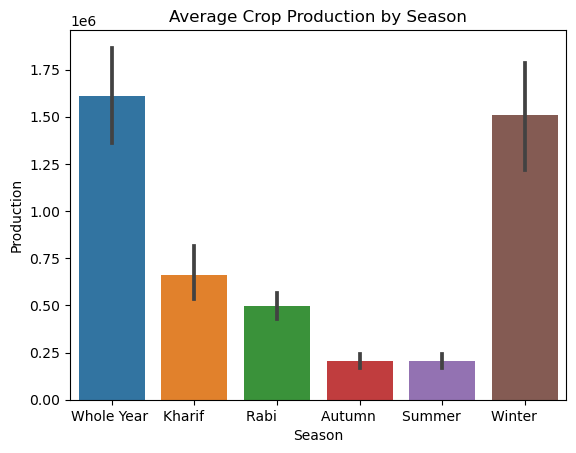

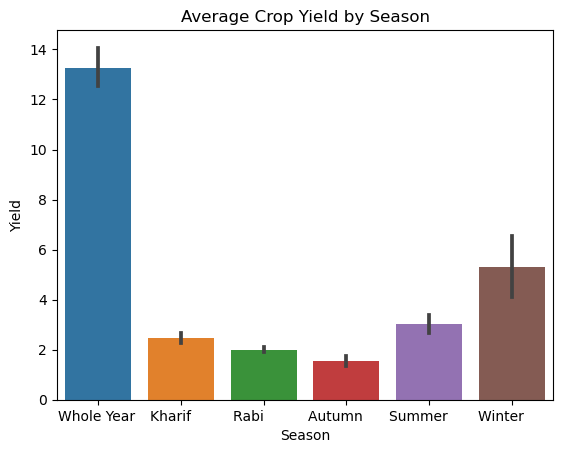

In [45]:
sns.barplot(x='Season', y='Production', data=df, estimator=np.mean)
plt.title('Average Crop Production by Season')
plt.show()

sns.barplot(x='Season', y='Yield', data=df, estimator=np.mean)
plt.title('Average Crop Yield by Season')
plt.show()


### Season vs Production (Y-scale = 10^6)

**Seasonal Variation:**

The plot clearly demonstrates that crop production varies significantly across different seasons.
Six distinct seasons or time periods are represented: Whole Year, Kharif, Rabi, Autumn, Summer, and Winter.


**Whole Year Production:**

The "Whole Year" category shows the highest average production, around 1.6 million units.
This likely represents the total annual production across all seasons.


**Major Growing Seasons:**

Winter emerges as the second most productive season, with average production around 1.5 million units.
Kharif (monsoon) season is the third most productive, yielding about 0.7 million units on average.


**Secondary Growing Seasons:**

Rabi season shows moderate production levels, averaging about 0.5 million units.
Autumn and Summer have the lowest production, both under 0.25 million units.


### Season vs Yield

**Seasonal Variation:**

The graph clearly illustrates that crop yield varies significantly across different seasons.
Six distinct categories are presented: Whole Year, Kharif, Rabi, Autumn, Summer, and Winter.


**Whole Year Yield:**

The "Whole Year" category shows the highest average yield, around 13.5 units.
This likely represents an overall average yield across all seasons or potentially cumulative yield.


**Winter Yield:**

Winter emerges as the season with the second-highest yield, averaging about 5.5 units.
It also shows the largest variability, as indicated by the error bars.


**Summer Yield:**

Summer has the third-highest yield, averaging approximately 3.2 units.
This is notably different from the production graph, where Summer had one of the lowest outputs.


**Kharif Season:**

The Kharif (monsoon) season shows a moderate yield of about 2.5 units.
It has relatively small error bars, suggesting consistent yields during this season.


**Rabi Season:**

Rabi season yields are slightly lower than Kharif, at about 2 units.
The error bars are smaller, indicating more consistent yields compared to other seasons.


**Autumn Yield:**

Autumn shows the lowest yield among all seasons, at approximately 1.7 units.
It also has the smallest error bars, suggesting the most consistent (though lowest) yields.

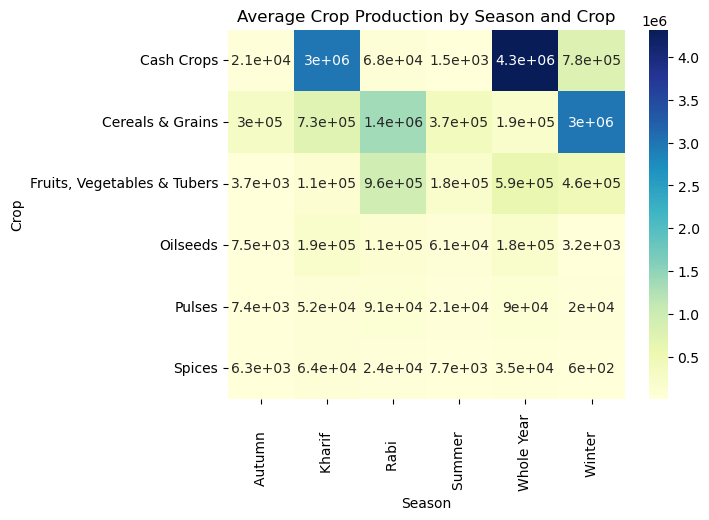

In [46]:
pivot_table_prod = df.pivot_table(index='Crop', columns='Season', values='Production', aggfunc='mean')
sns.heatmap(pivot_table_prod, annot=True, cmap='YlGnBu')
plt.title('Average Crop Production by Season and Crop')
plt.show()


### Write the analysis of this plot or you can also use the analysis from the next plot

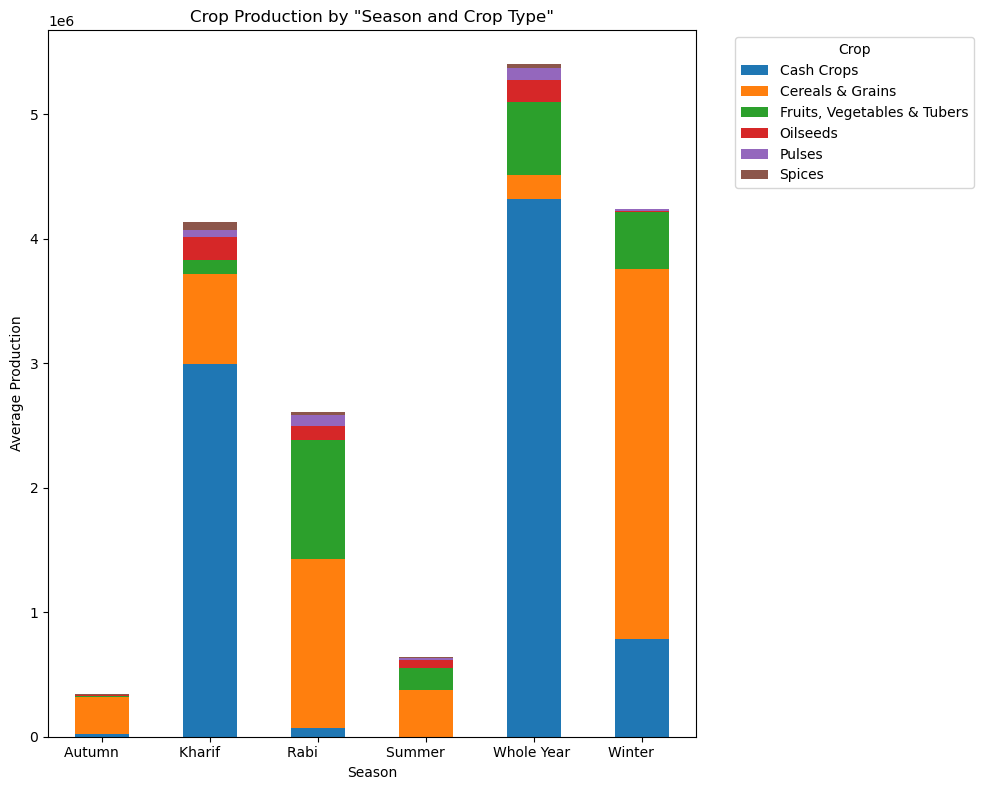

In [47]:
df_grouped = df.groupby(['Season', 'Crop'])['Production'].mean().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Crop Production by "Season and Crop Type"')
plt.xlabel('Season')
plt.ylabel('Average Production')
plt.xticks(rotation=0)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Orange Levels - Cereals & Grains**

- **Cereals and Grains are mostly produced in the season of 'Winter' and 'Rabi' followed by 'Kharif'**

**Blue Levels - Cash Crops**

- **Cash crops are mostly produced thorughout the year, especially inn the 'Kharif' season**

**Green Levels - Fruits, Vegetables and Tubers**
- **The most optimal season for growing Fruits, vegetables and Tubers is 'Rabi' though they are mostly produced throughout the year and also in 'winter' season**

**Red Levels- Oilseeds**
- **Preffered season for oilseeds is 'Kharif' and they are also produced throughout the year in some parts of the country.**

**Purple and Brown Levels - Pulses and spices**
- **Pulses and Spices have the preference for 'Kharif' and 'Rabi' Seasons though in some parts of the country, they are grown throughout the year.**

_______________________________________________________________________________________________________________________________
## DATA MODELLING 

In [48]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0  Cash Crops       1997  Whole Year   Assam  73814.0       56708   
1      Pulses       1997  Kharif       Assam   6637.0        4685   
2    Oilseeds       1997  Kharif       Assam    796.0          22   
4  Cash Crops       1997  Kharif       Assam   1739.0         794   
5      Spices       1997  Whole Year   Assam  13587.0        9073   

   Annual_Rainfall  Fertilizer  Pesticide     Yield Rainfall_bins  \
0           2051.4  7024878.38   22882.34  0.796087      1000+ mm   
1           2051.4   631643.29    2057.47  0.710435      1000+ mm   
2           2051.4    75755.32     246.76  0.238333      1000+ mm   
4           2051.4   165500.63     539.09  0.420909      1000+ mm   
5           2051.4  1293074.79    4211.97  0.643636      1000+ mm   

           Region  Log_Fertilizer Fertilizer_bins Pesticide_bins  
0  Eastern Region        6.846639          1M-10M         0-100K  
1  Eastern Region        5.800473         100K-1M         0-100K  
2  Eastern Region        4.879419          0-100K         0-100K  
4  Eastern Region        5.218802         100K-1M         0-100K  
5  Eastern Region        6.111624          1M-10M         0-100K

In [49]:
##Removing unnecessary columns created earlier for plots
df = df.drop(columns=['Rainfall_bins','Region','Log_Fertilizer', 'Fertilizer_bins','Pesticide_bins'])
df

Crop  Crop_Year       Season              State      Area  \
0            Cash Crops       1997  Whole Year               Assam   73814.0   
1                Pulses       1997  Kharif                   Assam    6637.0   
2              Oilseeds       1997  Kharif                   Assam     796.0   
4            Cash Crops       1997  Kharif                   Assam    1739.0   
5                Spices       1997  Whole Year               Assam   13587.0   
...                 ...        ...          ...                ...       ...   
19684  Cereals & Grains       1998  Kharif                Nagaland    4000.0   
19685  Cereals & Grains       1998  Rabi                  Nagaland    1000.0   
19686  Cereals & Grains       1997  Kharif       Jammu and Kashmir  310883.0   
19687  Cereals & Grains       1997  Kharif       Jammu and Kashmir  275746.0   
19688  Cereals & Grains       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708           2051.4   7024878.38   22882.34  0.796087  
1            4685           2051.4    631643.29    2057.47  0.710435  
2              22           2051.4     75755.32     246.76  0.238333  
4             794           2051.4    165500.63     539.09  0.420909  
5            9073           2051.4   1293074.79    4211.97  0.643636  
...           ...              ...          ...        ...       ...  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818  

[19390 rows x 10 columns]

In [50]:
df.shape

(19390, 10)

### Checking the unique categories and their count values in every categorical feature

In [51]:
import pandas as pd
from tabulate import tabulate

# Filter columns with object data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = df[column].value_counts()
    category_counts[column] = counts

# Beautify and print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(tabulate(counts.reset_index(), headers=[column, 'Count'], tablefmt='grid'))
    print()


Counts for Crop:
+----+-----------------------------+---------+
|    | Crop                        |   Count |
+====+=============================+=========+
|  0 | Cereals & Grains            |    5179 |
+----+-----------------------------+---------+
|  1 | Pulses                      |    4601 |
+----+-----------------------------+---------+
|  2 | Oilseeds                    |    3726 |
+----+-----------------------------+---------+
|  3 | Cash Crops                  |    2355 |
+----+-----------------------------+---------+
|  4 | Fruits, Vegetables & Tubers |    2051 |
+----+-----------------------------+---------+
|  5 | Spices                      |    1478 |
+----+-----------------------------+---------+

Counts for Season:
+----+------------+---------+
|    | Season     |   Count |
+====+============+=========+
|  0 | Kharif     |    8170 |
+----+------------+---------+
|  1 | Rabi       |    5690 |
+----+------------+---------+
|  2 | Whole Year |    3538 |
+----+------------

### States have 30, Crops  have 6 and Season have 6 unique in categories

### Basic Model

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm

In [53]:
data = df.copy()

### Removing Crop year as it does not actually impact the yield or production of the crop

In [54]:
data = data.drop(columns=['Crop_Year'])

In [55]:
X = data.drop(columns=['Yield'])
y = data['Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### Linear Regression

In [56]:
data.head(2)

Crop       Season  State     Area  Production  Annual_Rainfall  \
0  Cash Crops  Whole Year   Assam  73814.0       56708           2051.4   
1      Pulses  Kharif       Assam   6637.0        4685           2051.4   

   Fertilizer  Pesticide     Yield  
0  7024878.38   22882.34  0.796087  
1   631643.29    2057.47  0.710435

In [57]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3965909258563882
MAE: 4.125444123962393
MSE: 81.1254158046582
RMSE: 9.006964849751453


In [58]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9598634599579839
MAE: 0.5253757826731369
MSE: 5.396162635588592
RMSE: 2.3229641916285737


In [59]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.525865706965596
MAE: 0.8531212114497163
MSE: 63.74505011256948
RMSE: 7.984049731343704


In [60]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score: -1.2870910661493906
MAE: 14.98589104323864
MSE: 307.4882723429668
RMSE: 17.535343519388686


In [61]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score: 0.9323429208508139
MAE: 1.123593975184946
MSE: 9.096165293662914
RMSE: 3.015984962439785


### DATA KO ACHE SE SAAF AUR PREPROCESS KARKE SAHI SE MODELLING KAR ###

In [62]:
df

Crop  Crop_Year       Season              State      Area  \
0            Cash Crops       1997  Whole Year               Assam   73814.0   
1                Pulses       1997  Kharif                   Assam    6637.0   
2              Oilseeds       1997  Kharif                   Assam     796.0   
4            Cash Crops       1997  Kharif                   Assam    1739.0   
5                Spices       1997  Whole Year               Assam   13587.0   
...                 ...        ...          ...                ...       ...   
19684  Cereals & Grains       1998  Kharif                Nagaland    4000.0   
19685  Cereals & Grains       1998  Rabi                  Nagaland    1000.0   
19686  Cereals & Grains       1997  Kharif       Jammu and Kashmir  310883.0   
19687  Cereals & Grains       1997  Kharif       Jammu and Kashmir  275746.0   
19688  Cereals & Grains       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708           2051.4   7024878.38   22882.34  0.796087  
1            4685           2051.4    631643.29    2057.47  0.710435  
2              22           2051.4     75755.32     246.76  0.238333  
4             794           2051.4    165500.63     539.09  0.420909  
5            9073           2051.4   1293074.79    4211.97  0.643636  
...           ...              ...          ...        ...       ...  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818  

[19390 rows x 10 columns]

### Numerical features which have any 0 value entries --> log transformation cannot be applied

In [70]:
# Check if any numerical feature in the dataframe has 0 as an observation
zero_in_numerical = (df == 0).sum(axis=0)
numerical_columns_with_zeros = zero_in_numerical[zero_in_numerical > 0]

# Display columns that have 0 as an observation and the count of such observations
if len(numerical_columns_with_zeros) > 0:
    print("Columns with at least one observation equal to 0 and the number of such observations:")
    print(numerical_columns_with_zeros)
else:
    print("No numerical columns have observations equal to 0.")


Columns with at least one observation equal to 0 and the number of such observations:
Production    101
Yield         101
dtype: int64


### Production and Yield have 101 observations with 0 entries --> log transformation cannot be applied

### Area

In [66]:
df['Area'].describe()

count    1.939000e+04
mean     1.806726e+05
std      7.378075e+05
min      5.000000e-01
25%      1.405750e+03
50%      9.300000e+03
75%      7.499300e+04
max      5.080810e+07
Name: Area, dtype: float64

<Axes: xlabel='Area', ylabel='Count'>

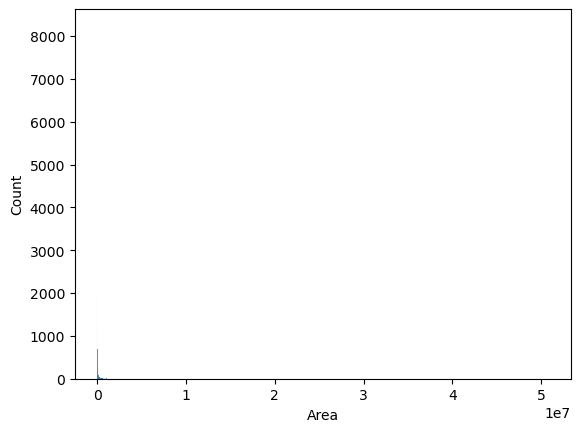

In [63]:
sns.histplot(df['Area'])

<Axes: xlabel='Area', ylabel='Count'>

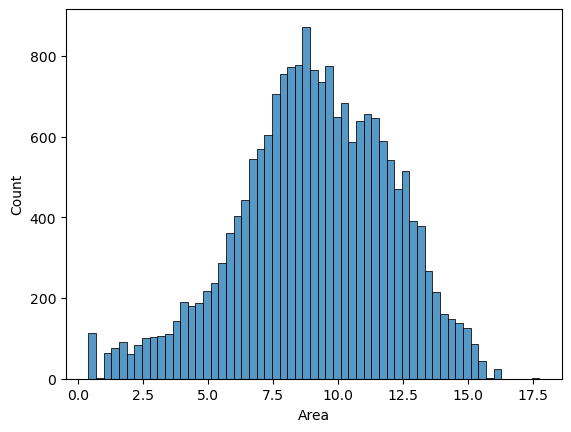

In [64]:
sns.histplot(np.log1p(df['Area'])) ### log transformation will work well

### Production

In [85]:
df.shape

(19390, 10)

In [90]:
len(df[df['Production'] > 1])

19212

### Removing very low values of production i.e. 0 - 1

In [91]:
df = df[df['Production']>1]

<Axes: xlabel='Production', ylabel='Count'>

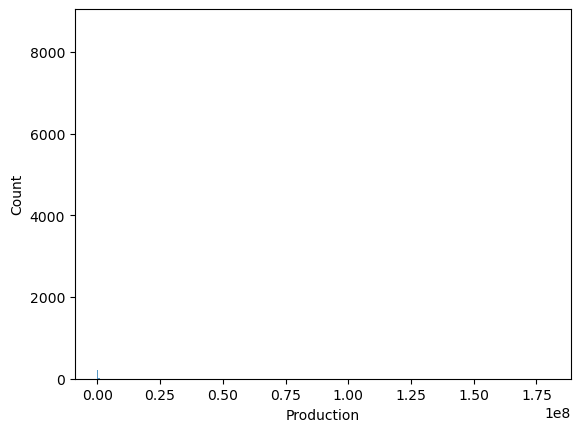

In [92]:
sns.histplot(df['Production'])

<Axes: xlabel='Production', ylabel='Count'>

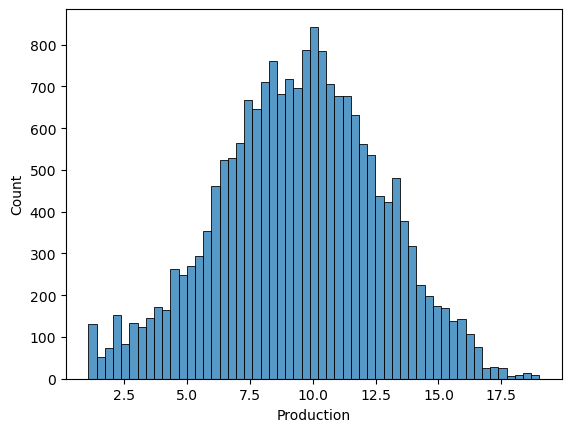

In [94]:
sns.histplot(np.log1p(df['Production'])) ## log transformation can be applied now

### Annual Rainfall

<Axes: xlabel='Annual_Rainfall', ylabel='Count'>

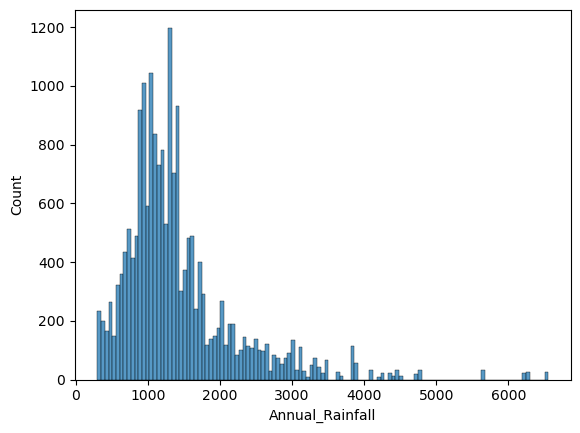

In [95]:
sns.histplot(df['Annual_Rainfall']) ## okkk

### Fertilizer

<Axes: xlabel='Fertilizer', ylabel='Count'>

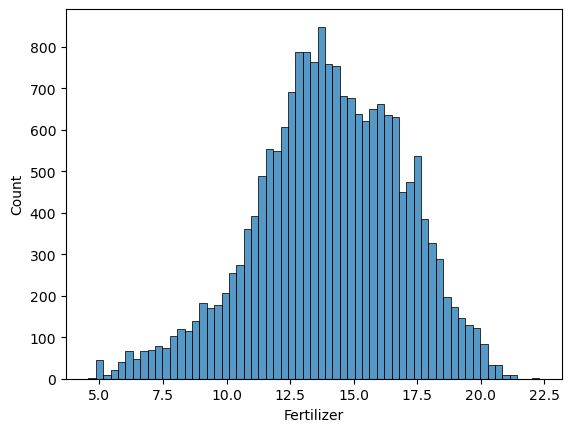

In [97]:
sns.histplot(np.log1p(df['Fertilizer'])) ## log tranformation seems good

### Pesticide

<Axes: xlabel='Pesticide', ylabel='Count'>

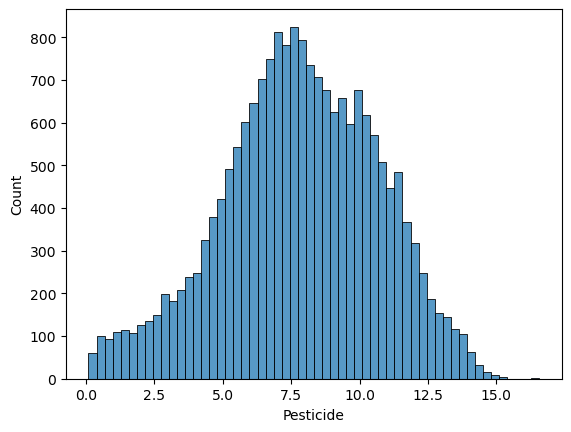

In [99]:
sns.histplot(np.log1p(df['Pesticide'])) ##log transform is good

### Yield

<Axes: xlabel='Yield', ylabel='Count'>

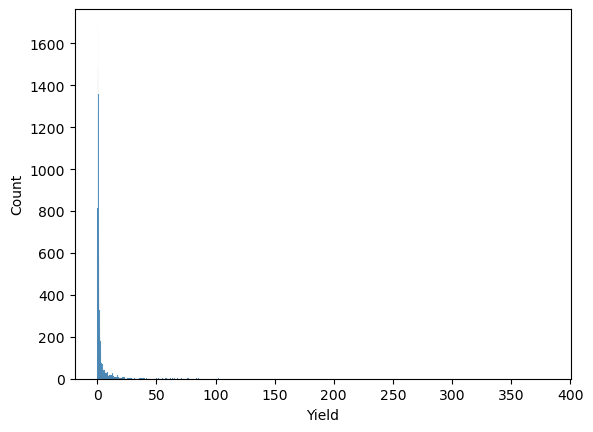

In [101]:
sns.histplot(df['Yield'])

<Axes: xlabel='Yield', ylabel='Count'>

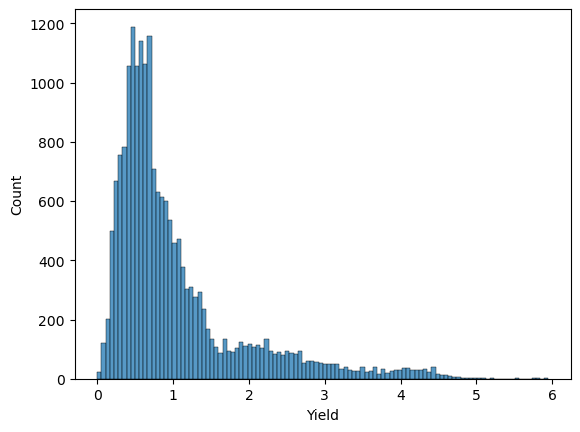

In [102]:
sns.histplot(np.log1p(df['Yield'])) ## seems fine --> log transformation

- Area, Production, Fertilizer, Pesticide, Yield --> log transformation
- Annual Rainfall --> leave as it is

In [103]:
df['Area'] = np.log1p(df['Area'])
df['Production'] = np.log1p(df['Production'])
df['Fertilizer'] = np.log1p(df['Fertilizer'])
df['Pesticide'] = np.log1p(df['Pesticide'])
df['Yield'] = np.log1p(df['Yield'])

### Crop Year ko drop kar rhe h

In [105]:
df.drop(columns=['Crop_Year'], inplace = True)

In [106]:
df

Crop       Season              State       Area  \
0            Cash Crops  Whole Year               Assam  11.209317   
1                Pulses  Kharif                   Assam   8.800566   
2              Oilseeds  Kharif                   Assam   6.680855   
4            Cash Crops  Kharif                   Assam   7.461640   
5                Spices  Whole Year               Assam   9.516942   
...                 ...          ...                ...        ...   
19684  Cereals & Grains  Kharif                Nagaland   8.294300   
19685  Cereals & Grains  Rabi                  Nagaland   6.908755   
19686  Cereals & Grains  Kharif       Jammu and Kashmir  12.647175   
19687  Cereals & Grains  Kharif       Jammu and Kashmir  12.527239   
19688  Cereals & Grains  Rabi         Jammu and Kashmir  12.385661   

       Production  Annual_Rainfall  Fertilizer  Pesticide     Yield  
0       10.945688           2051.4   15.764969  10.038164  0.585610  
1        8.452335           2051.4   13.356082   7.629718  0.536748  
2        3.135494           2051.4   11.235277   5.512461  0.213766  
4        6.678342           2051.4   12.016736   6.291736  0.351297  
5        9.113168           2051.4   14.072534   8.345923  0.496911  
...           ...              ...         ...        ...       ...  
19684    7.601402           1498.0   12.887150   7.057037  0.405465  
19685    8.006701           1498.0   11.500863   5.673323  1.386294  
19686   12.996576           1356.2   17.202837  11.475999  0.826366  
19687    8.610501           1356.2   17.082900  11.356064  0.016529  
19688   12.879428           1356.2   16.941322  11.214488  0.816169  

[19212 rows x 9 columns]

### Categorical Features Encoding and Modelling

In [107]:
df['Crop'].value_counts()

Cereals & Grains               5162
Pulses                         4555
Oilseeds                       3705
Cash Crops                     2306
Fruits, Vegetables & Tubers    2031
Spices                         1453
Name: Crop, dtype: int64

In [108]:
df['Season'].value_counts()

Kharif         8079
Rabi           5661
Whole Year     3485
Summer         1185
Autumn          413
Winter          389
Name: Season, dtype: int64

In [109]:
df['State'].value_counts()

Karnataka            1408
Andhra Pradesh       1223
West Bengal          1069
Bihar                 896
Chhattisgarh          893
Madhya Pradesh        842
Uttar Pradesh         825
Gujarat               815
Tamil Nadu            796
Maharashtra           760
Odisha                760
Uttarakhand           713
Assam                 709
Nagaland              684
Meghalaya             649
Puducherry            615
Himachal Pradesh      611
Haryana               597
Jammu and Kashmir     595
Kerala                485
Manipur               443
Tripura               438
Mizoram               403
Punjab                396
Telangana             385
Arunachal Pradesh     288
Jharkhand             270
Goa                   225
Sikkim                221
Delhi                 198
Name: State, dtype: int64

In [118]:
# Define the categorical columns
categorical_columns = ["Crop", "Season", "State"]
numerical_features = ['Area','Production','Annual_Rainfall','Fertilizer','Pesticide', 'Yield']

In [119]:
from sklearn.preprocessing import OneHotEncoder

## Onehot encoding ka object banayenge pehle
enc = OneHotEncoder(sparse_output=False).fit(df[categorical_columns])

## encoding karke feature ko transform karenge abb
df_encoded = enc.transform(df[categorical_columns])
df_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [120]:
all_categories = []
for col, x in zip(categorical_columns, enc.categories_):
    for y in x:
        all_categories.append(col + '_' + y)

In [121]:
df_encoded = pd.concat([
    df[numerical_features].reset_index(drop=True), 
    pd.DataFrame(df_encoded, columns=all_categories).reset_index(drop=True)
], axis=1)

df_encoded

Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0      11.209317   10.945688           2051.4   15.764969  10.038164   
1       8.800566    8.452335           2051.4   13.356082   7.629718   
2       6.680855    3.135494           2051.4   11.235277   5.512461   
3       7.461640    6.678342           2051.4   12.016736   6.291736   
4       9.516942    9.113168           2051.4   14.072534   8.345923   
...          ...         ...              ...         ...        ...   
19207   8.294300    7.601402           1498.0   12.887150   7.057037   
19208   6.908755    8.006701           1498.0   11.500863   5.673323   
19209  12.647175   12.996576           1356.2   17.202837  11.475999   
19210  12.527239    8.610501           1356.2   17.082900  11.356064   
19211  12.385661   12.879428           1356.2   16.941322  11.214488   

          Yield  Crop_Cash Crops  Crop_Cereals & Grains  \
0      0.585610              1.0                    0.0   
1      0.536748              0.0                    0.0   
2      0.213766              0.0                    0.0   
3      0.351297              1.0                    0.0   
4      0.496911              0.0                    0.0   
...         ...              ...                    ...   
19207  0.405465              0.0                    1.0   
19208  1.386294              0.0                    1.0   
19209  0.826366              0.0                    1.0   
19210  0.016529              0.0                    1.0   
19211  0.816169              0.0                    1.0   

       Crop_Fruits, Vegetables & Tubers  Crop_Oilseeds  ...  State_Odisha  \
0                                   0.0            0.0  ...           0.0   
1                                   0.0            0.0  ...           0.0   
2                                   0.0            1.0  ...           0.0   
3                                   0.0            0.0  ...           0.0   
4                                   0.0            0.0  ...           0.0   
...                                 ...            ...  ...           ...   
19207                               0.0            0.0  ...           0.0   
19208                               0.0            0.0  ...           0.0   
19209                               0.0            0.0  ...           0.0   
19210                               0.0            0.0  ...           0.0   
19211                               0.0            0.0  ...           0.0   

       State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0                   0.0           0.0           0.0               0.0   
1                   0.0           0.0           0.0               0.0   
2                   0.0           0.0           0.0               0.0   
3                   0.0           0.0           0.0               0.0   
4                   0.0           0.0           0.0               0.0   
...                 ...           ...           ...               ...   
19207               0.0           0.0           0.0               0.0   
19208               0.0           0.0           0.0               0.0   
19209               0.0           0.0           0.0               0.0   
19210               0.0           0.0           0.0               0.0   
19211               0.0           0.0           0.0               0.0   

       State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0                  0.0            0.0                  0.0                0.0   
1                  0.0            0.0                  0.0                0.0   
2                  0.0            0.0                  0.0                0.0   
3                  0.0            0.0                  0.0                0.0   
4                  0.0            0.0                  0.0                0.0   
...                ...            ...                  ...                ...   
19207              0.0            0.0                  0.0           

In [122]:
df_encoded.isnull().sum() ## All Well

Area                                0
Production                          0
Annual_Rainfall                     0
Fertilizer                          0
Pesticide                           0
Yield                               0
Crop_Cash Crops                     0
Crop_Cereals & Grains               0
Crop_Fruits, Vegetables & Tubers    0
Crop_Oilseeds                       0
Crop_Pulses                         0
Crop_Spices                         0
Season_Autumn                       0
Season_Kharif                       0
Season_Rabi                         0
Season_Summer                       0
Season_Whole Year                   0
Season_Winter                       0
State_Andhra Pradesh                0
State_Arunachal Pradesh             0
State_Assam                         0
State_Bihar                         0
State_Chhattisgarh                  0
State_Delhi                         0
State_Goa                           0
State_Gujarat                       0
State_Haryan

In [123]:
df_model = df_encoded.copy()
df_model

Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0      11.209317   10.945688           2051.4   15.764969  10.038164   
1       8.800566    8.452335           2051.4   13.356082   7.629718   
2       6.680855    3.135494           2051.4   11.235277   5.512461   
3       7.461640    6.678342           2051.4   12.016736   6.291736   
4       9.516942    9.113168           2051.4   14.072534   8.345923   
...          ...         ...              ...         ...        ...   
19207   8.294300    7.601402           1498.0   12.887150   7.057037   
19208   6.908755    8.006701           1498.0   11.500863   5.673323   
19209  12.647175   12.996576           1356.2   17.202837  11.475999   
19210  12.527239    8.610501           1356.2   17.082900  11.356064   
19211  12.385661   12.879428           1356.2   16.941322  11.214488   

          Yield  Crop_Cash Crops  Crop_Cereals & Grains  \
0      0.585610              1.0                    0.0   
1      0.536748              0.0                    0.0   
2      0.213766              0.0                    0.0   
3      0.351297              1.0                    0.0   
4      0.496911              0.0                    0.0   
...         ...              ...                    ...   
19207  0.405465              0.0                    1.0   
19208  1.386294              0.0                    1.0   
19209  0.826366              0.0                    1.0   
19210  0.016529              0.0                    1.0   
19211  0.816169              0.0                    1.0   

       Crop_Fruits, Vegetables & Tubers  Crop_Oilseeds  ...  State_Odisha  \
0                                   0.0            0.0  ...           0.0   
1                                   0.0            0.0  ...           0.0   
2                                   0.0            1.0  ...           0.0   
3                                   0.0            0.0  ...           0.0   
4                                   0.0            0.0  ...           0.0   
...                                 ...            ...  ...           ...   
19207                               0.0            0.0  ...           0.0   
19208                               0.0            0.0  ...           0.0   
19209                               0.0            0.0  ...           0.0   
19210                               0.0            0.0  ...           0.0   
19211                               0.0            0.0  ...           0.0   

       State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0                   0.0           0.0           0.0               0.0   
1                   0.0           0.0           0.0               0.0   
2                   0.0           0.0           0.0               0.0   
3                   0.0           0.0           0.0               0.0   
4                   0.0           0.0           0.0               0.0   
...                 ...           ...           ...               ...   
19207               0.0           0.0           0.0               0.0   
19208               0.0           0.0           0.0               0.0   
19209               0.0           0.0           0.0               0.0   
19210               0.0           0.0           0.0               0.0   
19211               0.0           0.0           0.0               0.0   

       State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0                  0.0            0.0                  0.0                0.0   
1                  0.0            0.0                  0.0                0.0   
2                  0.0            0.0                  0.0                0.0   
3                  0.0            0.0                  0.0                0.0   
4                  0.0            0.0                  0.0                0.0   
...                ...            ...                  ...                ...   
19207              0.0            0.0                  0.0           

In [124]:
df

Crop       Season              State       Area  \
0            Cash Crops  Whole Year               Assam  11.209317   
1                Pulses  Kharif                   Assam   8.800566   
2              Oilseeds  Kharif                   Assam   6.680855   
4            Cash Crops  Kharif                   Assam   7.461640   
5                Spices  Whole Year               Assam   9.516942   
...                 ...          ...                ...        ...   
19684  Cereals & Grains  Kharif                Nagaland   8.294300   
19685  Cereals & Grains  Rabi                  Nagaland   6.908755   
19686  Cereals & Grains  Kharif       Jammu and Kashmir  12.647175   
19687  Cereals & Grains  Kharif       Jammu and Kashmir  12.527239   
19688  Cereals & Grains  Rabi         Jammu and Kashmir  12.385661   

       Production  Annual_Rainfall  Fertilizer  Pesticide     Yield  
0       10.945688           2051.4   15.764969  10.038164  0.585610  
1        8.452335           2051.4   13.356082   7.629718  0.536748  
2        3.135494           2051.4   11.235277   5.512461  0.213766  
4        6.678342           2051.4   12.016736   6.291736  0.351297  
5        9.113168           2051.4   14.072534   8.345923  0.496911  
...           ...              ...         ...        ...       ...  
19684    7.601402           1498.0   12.887150   7.057037  0.405465  
19685    8.006701           1498.0   11.500863   5.673323  1.386294  
19686   12.996576           1356.2   17.202837  11.475999  0.826366  
19687    8.610501           1356.2   17.082900  11.356064  0.016529  
19688   12.879428           1356.2   16.941322  11.214488  0.816169  

[19212 rows x 9 columns]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [05:39<00:00, 24.27s/it]


                   Train Mean Squared Error  Train Root Mean Squared Error  \
Linear Regression                     0.045                          0.213   
Ridge                                 0.045                          0.213   
Lasso                                 0.758                          0.871   
Random Forest                         0.002                          0.048   
AdaBoost                              0.337                          0.581   
GradientBoosting                      0.043                          0.208   
SVR                                   0.006                          0.078   
KNeighbors                            0.032                          0.178   
Decision Tree                         0.000                          0.000   
CatBoost                              0.007                          0.081   
XGBoost                               0.004                          0.067   
Extra Trees                           0.000                     

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  4.60it/s]


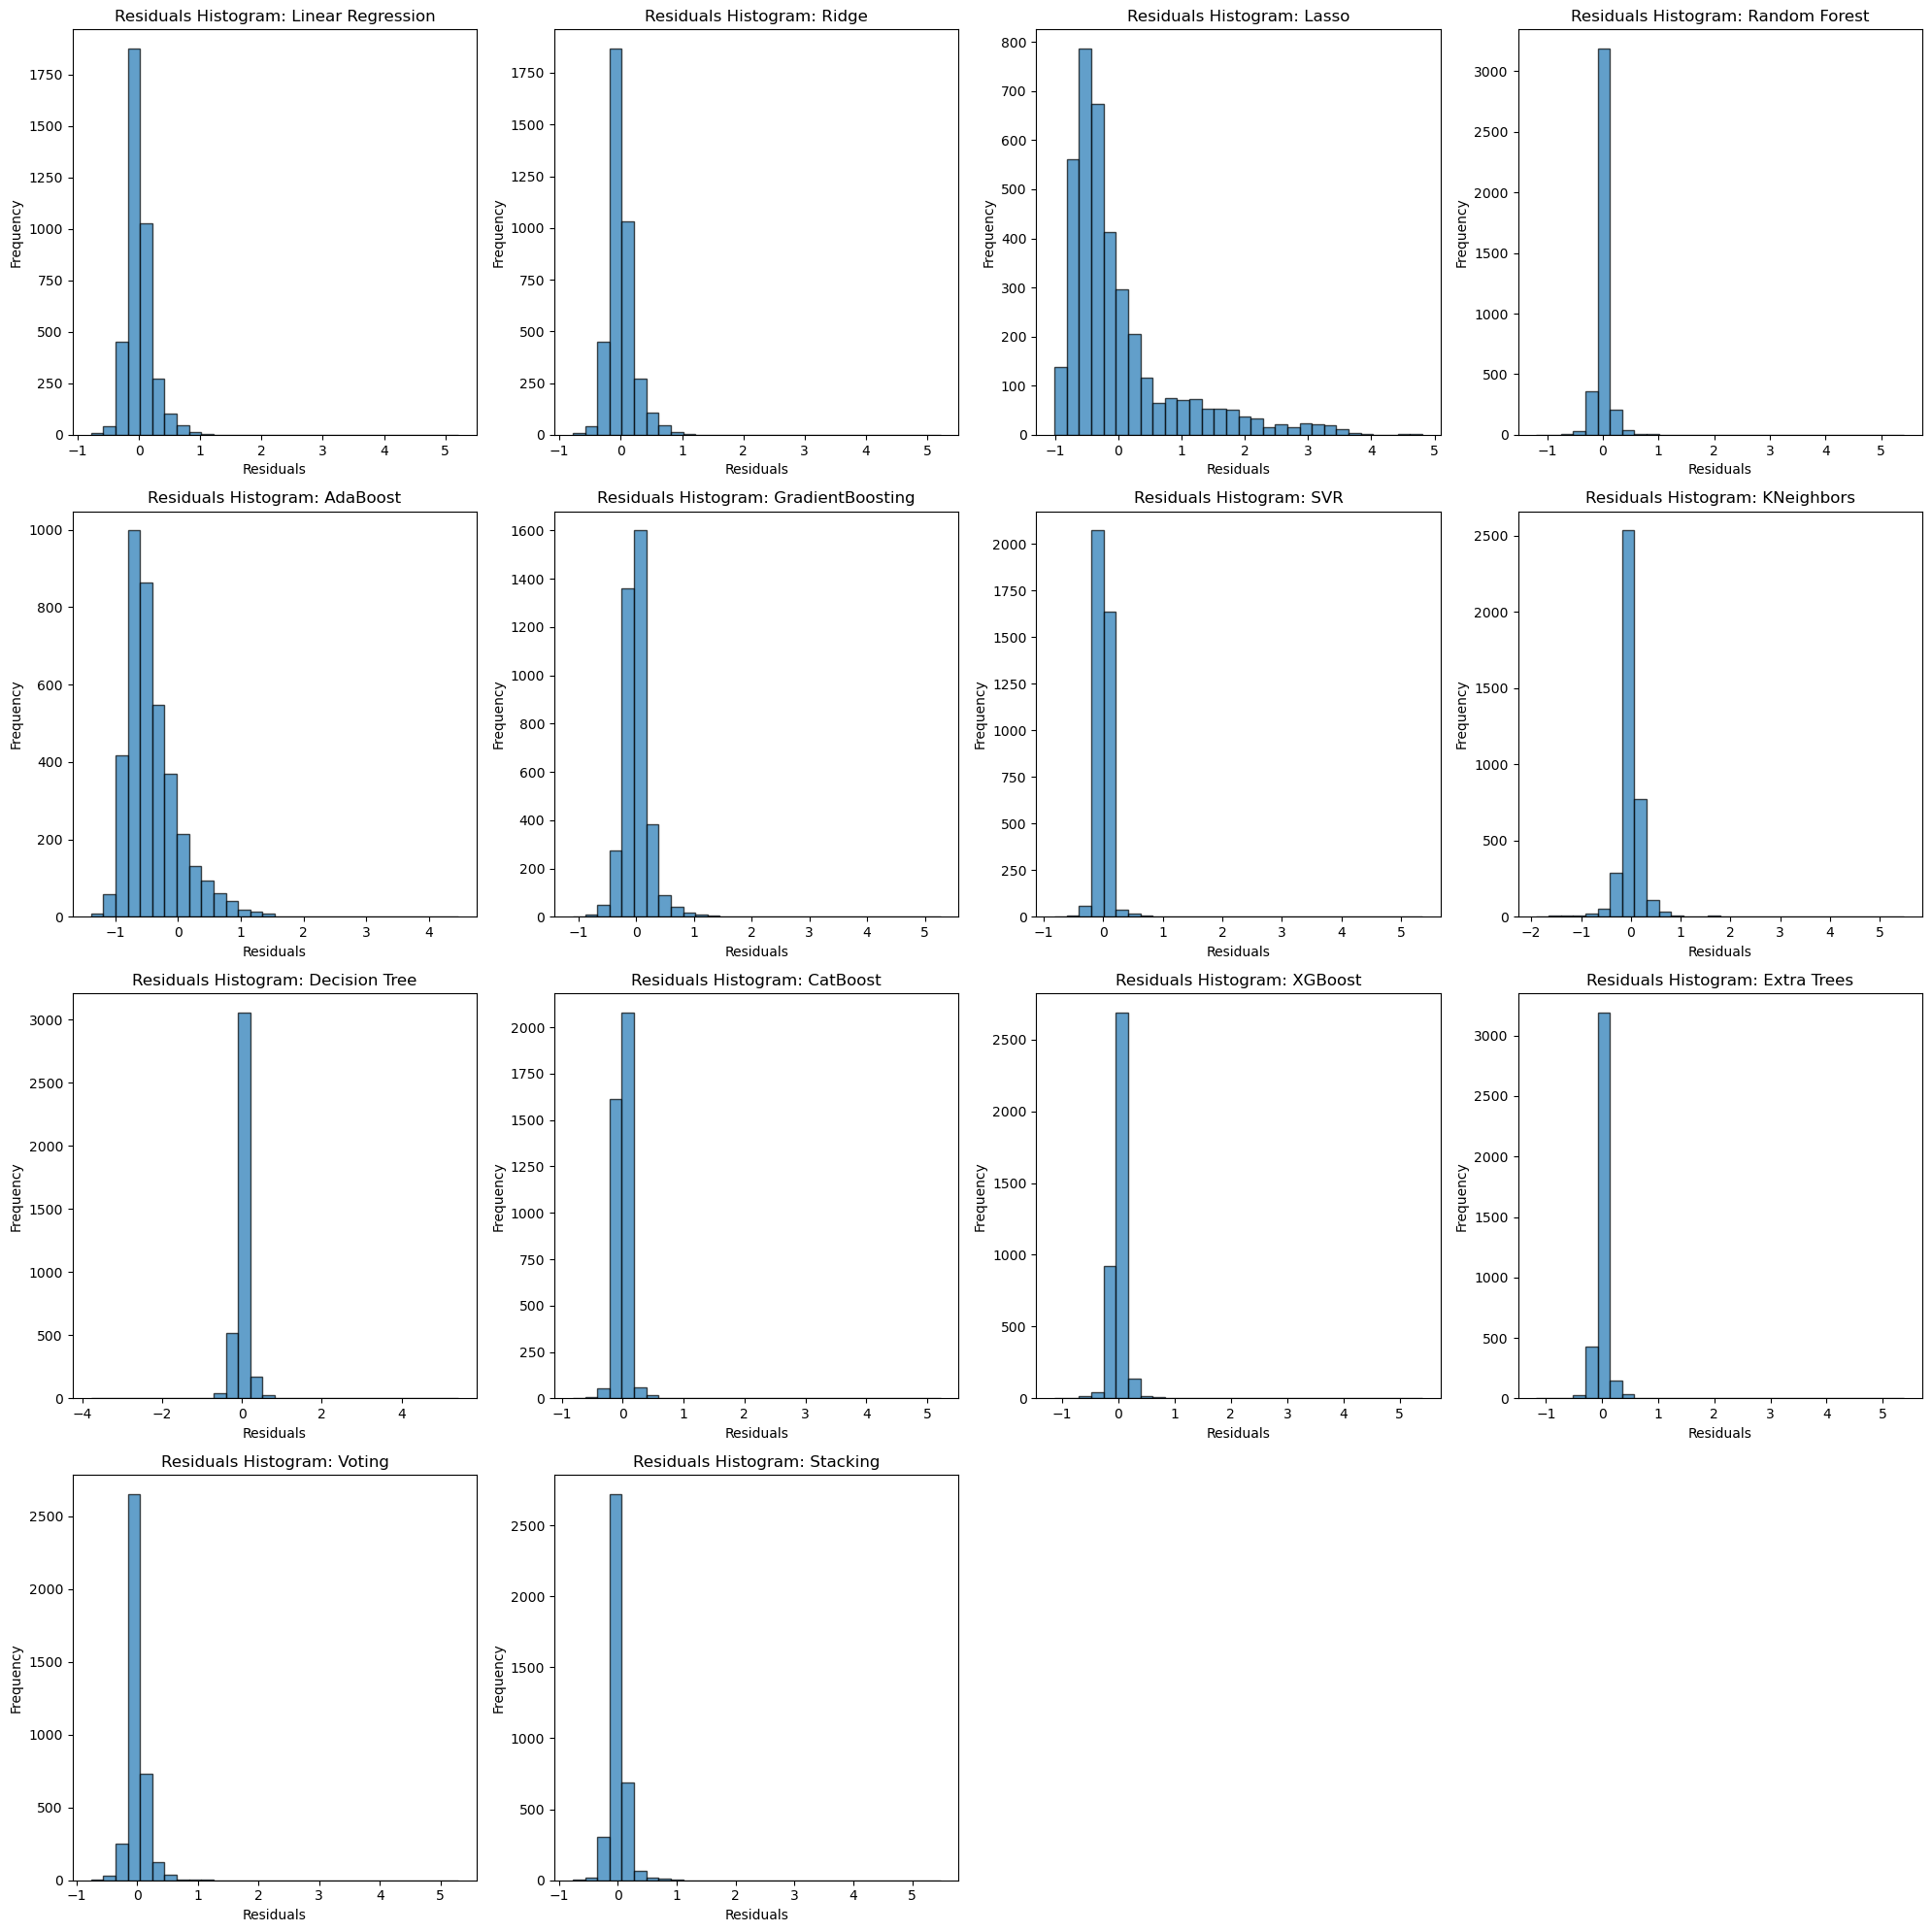

In [127]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# X and y split (X = input features and y = target feature)
X = df_model.drop(columns=['Yield'])
y = df_model['Yield']

# # Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False, drop=None)
# X_encoded = encoder.fit_transform(X[categorical_features])
# X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# # Combine numerical and encoded categorical features
# X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf',C=10000,epsilon=0.1),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor(eval_metric='rmse'),
    #'LightGBM': LGBMRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Voting': VotingRegressor(estimators=[
        ('lr', LinearRegression()),  # ye combinations change kiye jaa sakte h aur inhe change karke aur new models k combination mai run kiya ja sakta h
        ('rf', RandomForestRegressor()), 
        ('gbr', GradientBoostingRegressor())
    ]),
    'Stacking': StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),# ye combinations change kiye jaa sakte h aur inhe change karke aur new models k combination mai run kiya ja sakta h
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
    ])
}

# Train and evaluate models
results = {}

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    testing_time = time.time() - start_time
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'Train Mean Squared Error': mse_train,
        'Train Root Mean Squared Error': rmse_train,
        'Train Mean Absolute Error': mae_train,
        'Train R2 Score': r2_train,
        'Test Mean Squared Error': mse_test,
        'Test Root Mean Squared Error': rmse_test,
        'Test Mean Absolute Error': mae_test,
        'Test R2 Score': r2_test,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time
    }

# Display results with exact values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df = pd.DataFrame(results).T
print(results_df)

# Plot histogram of residuals for each model
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.subplot(4, 4, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram: {name}')

plt.tight_layout()
plt.show()


In [128]:
results_df

Train Mean Squared Error  Train Root Mean Squared Error  \
Linear Regression                     0.045                          0.213   
Ridge                                 0.045                          0.213   
Lasso                                 0.758                          0.871   
Random Forest                         0.002                          0.048   
AdaBoost                              0.337                          0.581   
GradientBoosting                      0.043                          0.208   
SVR                                   0.006                          0.078   
KNeighbors                            0.032                          0.178   
Decision Tree                         0.000                          0.000   
CatBoost                              0.007                          0.081   
XGBoost                               0.004                          0.067   
Extra Trees                           0.000                          0.000   
Voting                                0.014                          0.120   
Stacking                              0.010                          0.102   

                   Train Mean Absolute Error  Train R2 Score  \
Linear Regression                      0.144           0.940   
Ridge                                  0.144           0.940   
Lasso                                  0.625           0.000   
Random Forest                          0.025           0.997   
AdaBoost                               0.516           0.555   
GradientBoosting                       0.145           0.943   
SVR                                    0.057           0.992   
KNeighbors                             0.098           0.958   
Decision Tree                          0.000           1.000   
CatBoost                               0.055           0.991   
XGBoost                                0.046           0.994   
Extra Trees                            0.000           1.000   
Voting                                 0.075           0.981   
Stacking                               0.069           0.986   

                   Test Mean Squared Error  Test Root Mean Squared Error  \
Linear Regression                    0.051                         0.226   
Ridge                                0.051                         0.226   
Lasso                                0.785                         0.886   
Random Forest                        0.023                         0.152   
AdaBoost                             0.353                         0.594   
GradientBoosting                     0.058                         0.241   
SVR                                  0.019                         0.137   
KNeighbors                           0.056                         0.238   
Decision Tree                        0.047                         0.218   
CatBoost                             0.017                         0.131   
XGBoost                              0.023                         0.152   
Extra Trees                          0.020                         0.141   
Voting                               0.028                         0.167   
Stacking                             0.027                         0.165   

                   Test Mean Absolute Error  Test R2 Score  Training Time (s)  \
Linear Regression                     0.148          0.935              0.050   
Ridge                                 0.148          0.935              0.016   
Lasso                                 0.632         -0.000              0.016   
Random Forest                         0.068          0.971             22.546   
AdaBoost                              0.526          0.550              3.036   
GradientBoosting                      0.157          0.926              6.246   
SVR                                   0.070          0.976            206.761   
KNeighbors                            0.126          0.928              0.014   
Decision Tree    

### Using column transformer

In [131]:
df

Crop       Season              State   Area  Production  \
0            Cash Crops  Whole Year               Assam 11.209      10.946   
1                Pulses  Kharif                   Assam  8.801       8.452   
2              Oilseeds  Kharif                   Assam  6.681       3.135   
4            Cash Crops  Kharif                   Assam  7.462       6.678   
5                Spices  Whole Year               Assam  9.517       9.113   
...                 ...          ...                ...    ...         ...   
19684  Cereals & Grains  Kharif                Nagaland  8.294       7.601   
19685  Cereals & Grains  Rabi                  Nagaland  6.909       8.007   
19686  Cereals & Grains  Kharif       Jammu and Kashmir 12.647      12.997   
19687  Cereals & Grains  Kharif       Jammu and Kashmir 12.527       8.611   
19688  Cereals & Grains  Rabi         Jammu and Kashmir 12.386      12.879   

       Annual_Rainfall  Fertilizer  Pesticide  Yield  
0             2051.400      15.765     10.038  0.586  
1             2051.400      13.356      7.630  0.537  
2             2051.400      11.235      5.512  0.214  
4             2051.400      12.017      6.292  0.351  
5             2051.400      14.073      8.346  0.497  
...                ...         ...        ...    ...  
19684         1498.000      12.887      7.057  0.405  
19685         1498.000      11.501      5.673  1.386  
19686         1356.200      17.203     11.476  0.826  
19687         1356.200      17.083     11.356  0.017  
19688         1356.200      16.941     11.214  0.816  

[19212 rows x 9 columns]

In [133]:
X = df.drop(columns=['Yield'])
y = df['Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1,2]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Learning rate set to 0.063048
0:	learn: 0.8339567	total: 6.46ms	remaining: 6.45s
1:	learn: 0.8031967	total: 11.9ms	remaining: 5.95s
2:	learn: 0.7732447	total: 17.5ms	remaining: 5.82s
3:	learn: 0.7442939	total: 24ms	remaining: 5.96s
4:	learn: 0.7176295	total: 29.9ms	remaining: 5.95s
5:	learn: 0.6918051	total: 35.6ms	remaining: 5.89s
6:	learn: 0.6680000	total: 40.2ms	remaining: 5.71s
7:	learn: 0.6495871	total: 44.7ms	remaining: 5.54s
8:	learn: 0.6291172	total: 50ms	remaining: 5.5s
9:	learn: 0.6099839	total: 54.4ms	remaining: 5.38s
10:	learn: 0.5928835	total: 58.9ms	remaining: 5.3s
11:	learn: 0.5785048	total: 63.6ms	remaining: 5.24s
12:	learn: 0.5634822	total: 68.1ms	remaining: 5.17s
13:	learn: 0.5511942	total: 72.5ms	remaining: 5.11s
14:	learn: 0.5384402	total: 77.2ms	remaining: 5.07s
15:	learn: 0.5286373	total: 82.2ms	remaining: 5.06s
16:	learn: 0.5144413	total: 88.7ms	remaining: 5.13s
17:	learn: 0.5053492	total: 93.6ms	remaining: 5.1s
18:	learn: 0.4928895	total: 98.4ms	remaining: 5.08s

194:	learn: 0.1489140	total: 951ms	remaining: 3.92s
195:	learn: 0.1485245	total: 956ms	remaining: 3.92s
196:	learn: 0.1480323	total: 961ms	remaining: 3.92s
197:	learn: 0.1476619	total: 967ms	remaining: 3.91s
198:	learn: 0.1473258	total: 971ms	remaining: 3.91s
199:	learn: 0.1470237	total: 977ms	remaining: 3.91s
200:	learn: 0.1466074	total: 982ms	remaining: 3.9s
201:	learn: 0.1462222	total: 987ms	remaining: 3.9s
202:	learn: 0.1458260	total: 993ms	remaining: 3.9s
203:	learn: 0.1455851	total: 997ms	remaining: 3.89s
204:	learn: 0.1453388	total: 1s	remaining: 3.88s
205:	learn: 0.1450666	total: 1.01s	remaining: 3.88s
206:	learn: 0.1445422	total: 1.01s	remaining: 3.87s
207:	learn: 0.1442628	total: 1.01s	remaining: 3.87s
208:	learn: 0.1439139	total: 1.02s	remaining: 3.86s
209:	learn: 0.1435632	total: 1.02s	remaining: 3.86s
210:	learn: 0.1433266	total: 1.03s	remaining: 3.85s
211:	learn: 0.1430611	total: 1.03s	remaining: 3.85s
212:	learn: 0.1427243	total: 1.04s	remaining: 3.84s
213:	learn: 0.1423

378:	learn: 0.1125304	total: 1.72s	remaining: 2.81s
379:	learn: 0.1124359	total: 1.72s	remaining: 2.81s
380:	learn: 0.1123202	total: 1.73s	remaining: 2.81s
381:	learn: 0.1122655	total: 1.73s	remaining: 2.8s
382:	learn: 0.1121773	total: 1.73s	remaining: 2.79s
383:	learn: 0.1120680	total: 1.74s	remaining: 2.79s
384:	learn: 0.1119760	total: 1.74s	remaining: 2.78s
385:	learn: 0.1118341	total: 1.75s	remaining: 2.78s
386:	learn: 0.1117843	total: 1.75s	remaining: 2.77s
387:	learn: 0.1116785	total: 1.75s	remaining: 2.77s
388:	learn: 0.1115617	total: 1.76s	remaining: 2.76s
389:	learn: 0.1114771	total: 1.76s	remaining: 2.76s
390:	learn: 0.1114089	total: 1.76s	remaining: 2.75s
391:	learn: 0.1112816	total: 1.77s	remaining: 2.74s
392:	learn: 0.1111937	total: 1.77s	remaining: 2.74s
393:	learn: 0.1111122	total: 1.78s	remaining: 2.73s
394:	learn: 0.1110566	total: 1.78s	remaining: 2.73s
395:	learn: 0.1109531	total: 1.78s	remaining: 2.72s
396:	learn: 0.1108917	total: 1.79s	remaining: 2.72s
397:	learn: 0

537:	learn: 0.1000168	total: 2.32s	remaining: 1.99s
538:	learn: 0.0999631	total: 2.32s	remaining: 1.99s
539:	learn: 0.0998957	total: 2.33s	remaining: 1.98s
540:	learn: 0.0998374	total: 2.33s	remaining: 1.98s
541:	learn: 0.0997820	total: 2.34s	remaining: 1.98s
542:	learn: 0.0997264	total: 2.34s	remaining: 1.97s
543:	learn: 0.0996788	total: 2.35s	remaining: 1.97s
544:	learn: 0.0996456	total: 2.35s	remaining: 1.96s
545:	learn: 0.0995841	total: 2.35s	remaining: 1.96s
546:	learn: 0.0995214	total: 2.36s	remaining: 1.95s
547:	learn: 0.0994656	total: 2.36s	remaining: 1.95s
548:	learn: 0.0993929	total: 2.36s	remaining: 1.94s
549:	learn: 0.0992706	total: 2.37s	remaining: 1.94s
550:	learn: 0.0992160	total: 2.37s	remaining: 1.93s
551:	learn: 0.0991531	total: 2.38s	remaining: 1.93s
552:	learn: 0.0991291	total: 2.38s	remaining: 1.92s
553:	learn: 0.0990888	total: 2.38s	remaining: 1.92s
554:	learn: 0.0990416	total: 2.38s	remaining: 1.91s
555:	learn: 0.0989880	total: 2.39s	remaining: 1.91s
556:	learn: 

714:	learn: 0.0911526	total: 3.09s	remaining: 1.23s
715:	learn: 0.0911202	total: 3.1s	remaining: 1.23s
716:	learn: 0.0910808	total: 3.1s	remaining: 1.22s
717:	learn: 0.0909975	total: 3.1s	remaining: 1.22s
718:	learn: 0.0909637	total: 3.11s	remaining: 1.21s
719:	learn: 0.0909156	total: 3.11s	remaining: 1.21s
720:	learn: 0.0908920	total: 3.12s	remaining: 1.21s
721:	learn: 0.0908356	total: 3.12s	remaining: 1.2s
722:	learn: 0.0907864	total: 3.12s	remaining: 1.2s
723:	learn: 0.0907470	total: 3.13s	remaining: 1.19s
724:	learn: 0.0907104	total: 3.13s	remaining: 1.19s
725:	learn: 0.0906779	total: 3.14s	remaining: 1.18s
726:	learn: 0.0906391	total: 3.14s	remaining: 1.18s
727:	learn: 0.0906058	total: 3.14s	remaining: 1.17s
728:	learn: 0.0905721	total: 3.15s	remaining: 1.17s
729:	learn: 0.0905309	total: 3.15s	remaining: 1.17s
730:	learn: 0.0905076	total: 3.15s	remaining: 1.16s
731:	learn: 0.0904810	total: 3.16s	remaining: 1.16s
732:	learn: 0.0904515	total: 3.16s	remaining: 1.15s
733:	learn: 0.090

908:	learn: 0.0847374	total: 3.87s	remaining: 387ms
909:	learn: 0.0847154	total: 3.88s	remaining: 383ms
910:	learn: 0.0846878	total: 3.88s	remaining: 379ms
911:	learn: 0.0846454	total: 3.88s	remaining: 375ms
912:	learn: 0.0846260	total: 3.89s	remaining: 370ms
913:	learn: 0.0845677	total: 3.89s	remaining: 366ms
914:	learn: 0.0845504	total: 3.9s	remaining: 362ms
915:	learn: 0.0845161	total: 3.9s	remaining: 358ms
916:	learn: 0.0844872	total: 3.9s	remaining: 353ms
917:	learn: 0.0844516	total: 3.91s	remaining: 349ms
918:	learn: 0.0844325	total: 3.91s	remaining: 345ms
919:	learn: 0.0844116	total: 3.92s	remaining: 341ms
920:	learn: 0.0843818	total: 3.92s	remaining: 336ms
921:	learn: 0.0843616	total: 3.92s	remaining: 332ms
922:	learn: 0.0843468	total: 3.93s	remaining: 328ms
923:	learn: 0.0843232	total: 3.93s	remaining: 324ms
924:	learn: 0.0842975	total: 3.94s	remaining: 319ms
925:	learn: 0.0842646	total: 3.94s	remaining: 315ms
926:	learn: 0.0842229	total: 3.95s	remaining: 311ms
927:	learn: 0.0

In [130]:
# import pickle

# # Dumping the scaler
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# # Dumping the one-hot encoder
# with open('onehot_encoder.pkl', 'wb') as f:
#     pickle.dump(enc, f)

# # Save the stacking model as a pickle file
# with open('catboost_model.pkl', 'wb') as f:
#     pickle.dump(models['CatBoost'], f)


In [135]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

<Axes: >

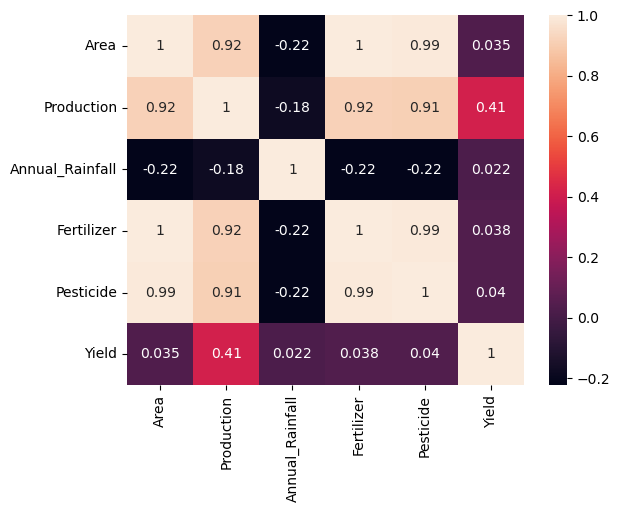

In [144]:
sns.heatmap(df.corr(),annot=True)

In [138]:
df.corr()

Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
Area             1.000       0.917           -0.221       0.997      0.993   
Production       0.917       1.000           -0.178       0.917      0.914   
Annual_Rainfall -0.221      -0.178            1.000      -0.222     -0.219   
Fertilizer       0.997       0.917           -0.222       1.000      0.992   
Pesticide        0.993       0.914           -0.219       0.992      1.000   
Yield            0.035       0.415            0.022       0.038      0.040   

                 Yield  
Area             0.035  
Production       0.415  
Annual_Rainfall  0.022  
Fertilizer       0.038  
Pesticide        0.040  
Yield            1.000

In [151]:
import catboost
print(catboost.__version__)


1.2.3
